# 03_Patrones Estacionales de cada producto


## Agronet

In [2]:
!pip install statsmodels

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.8 kB 440.4 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 404.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
    --------------------------------------- 0.1/9.9 MB 950.9 kB/s eta 0:00:11
   - -------------------------------------- 0.3/9.9 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.4/9.9 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.9 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/9.9 MB 2.2 MB/s eta 0:00:05
   --- --------------------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\dairo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


El dataset se compone de 4 Mercados: Corabastos,Tunja,Duitama y Sogamoso

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



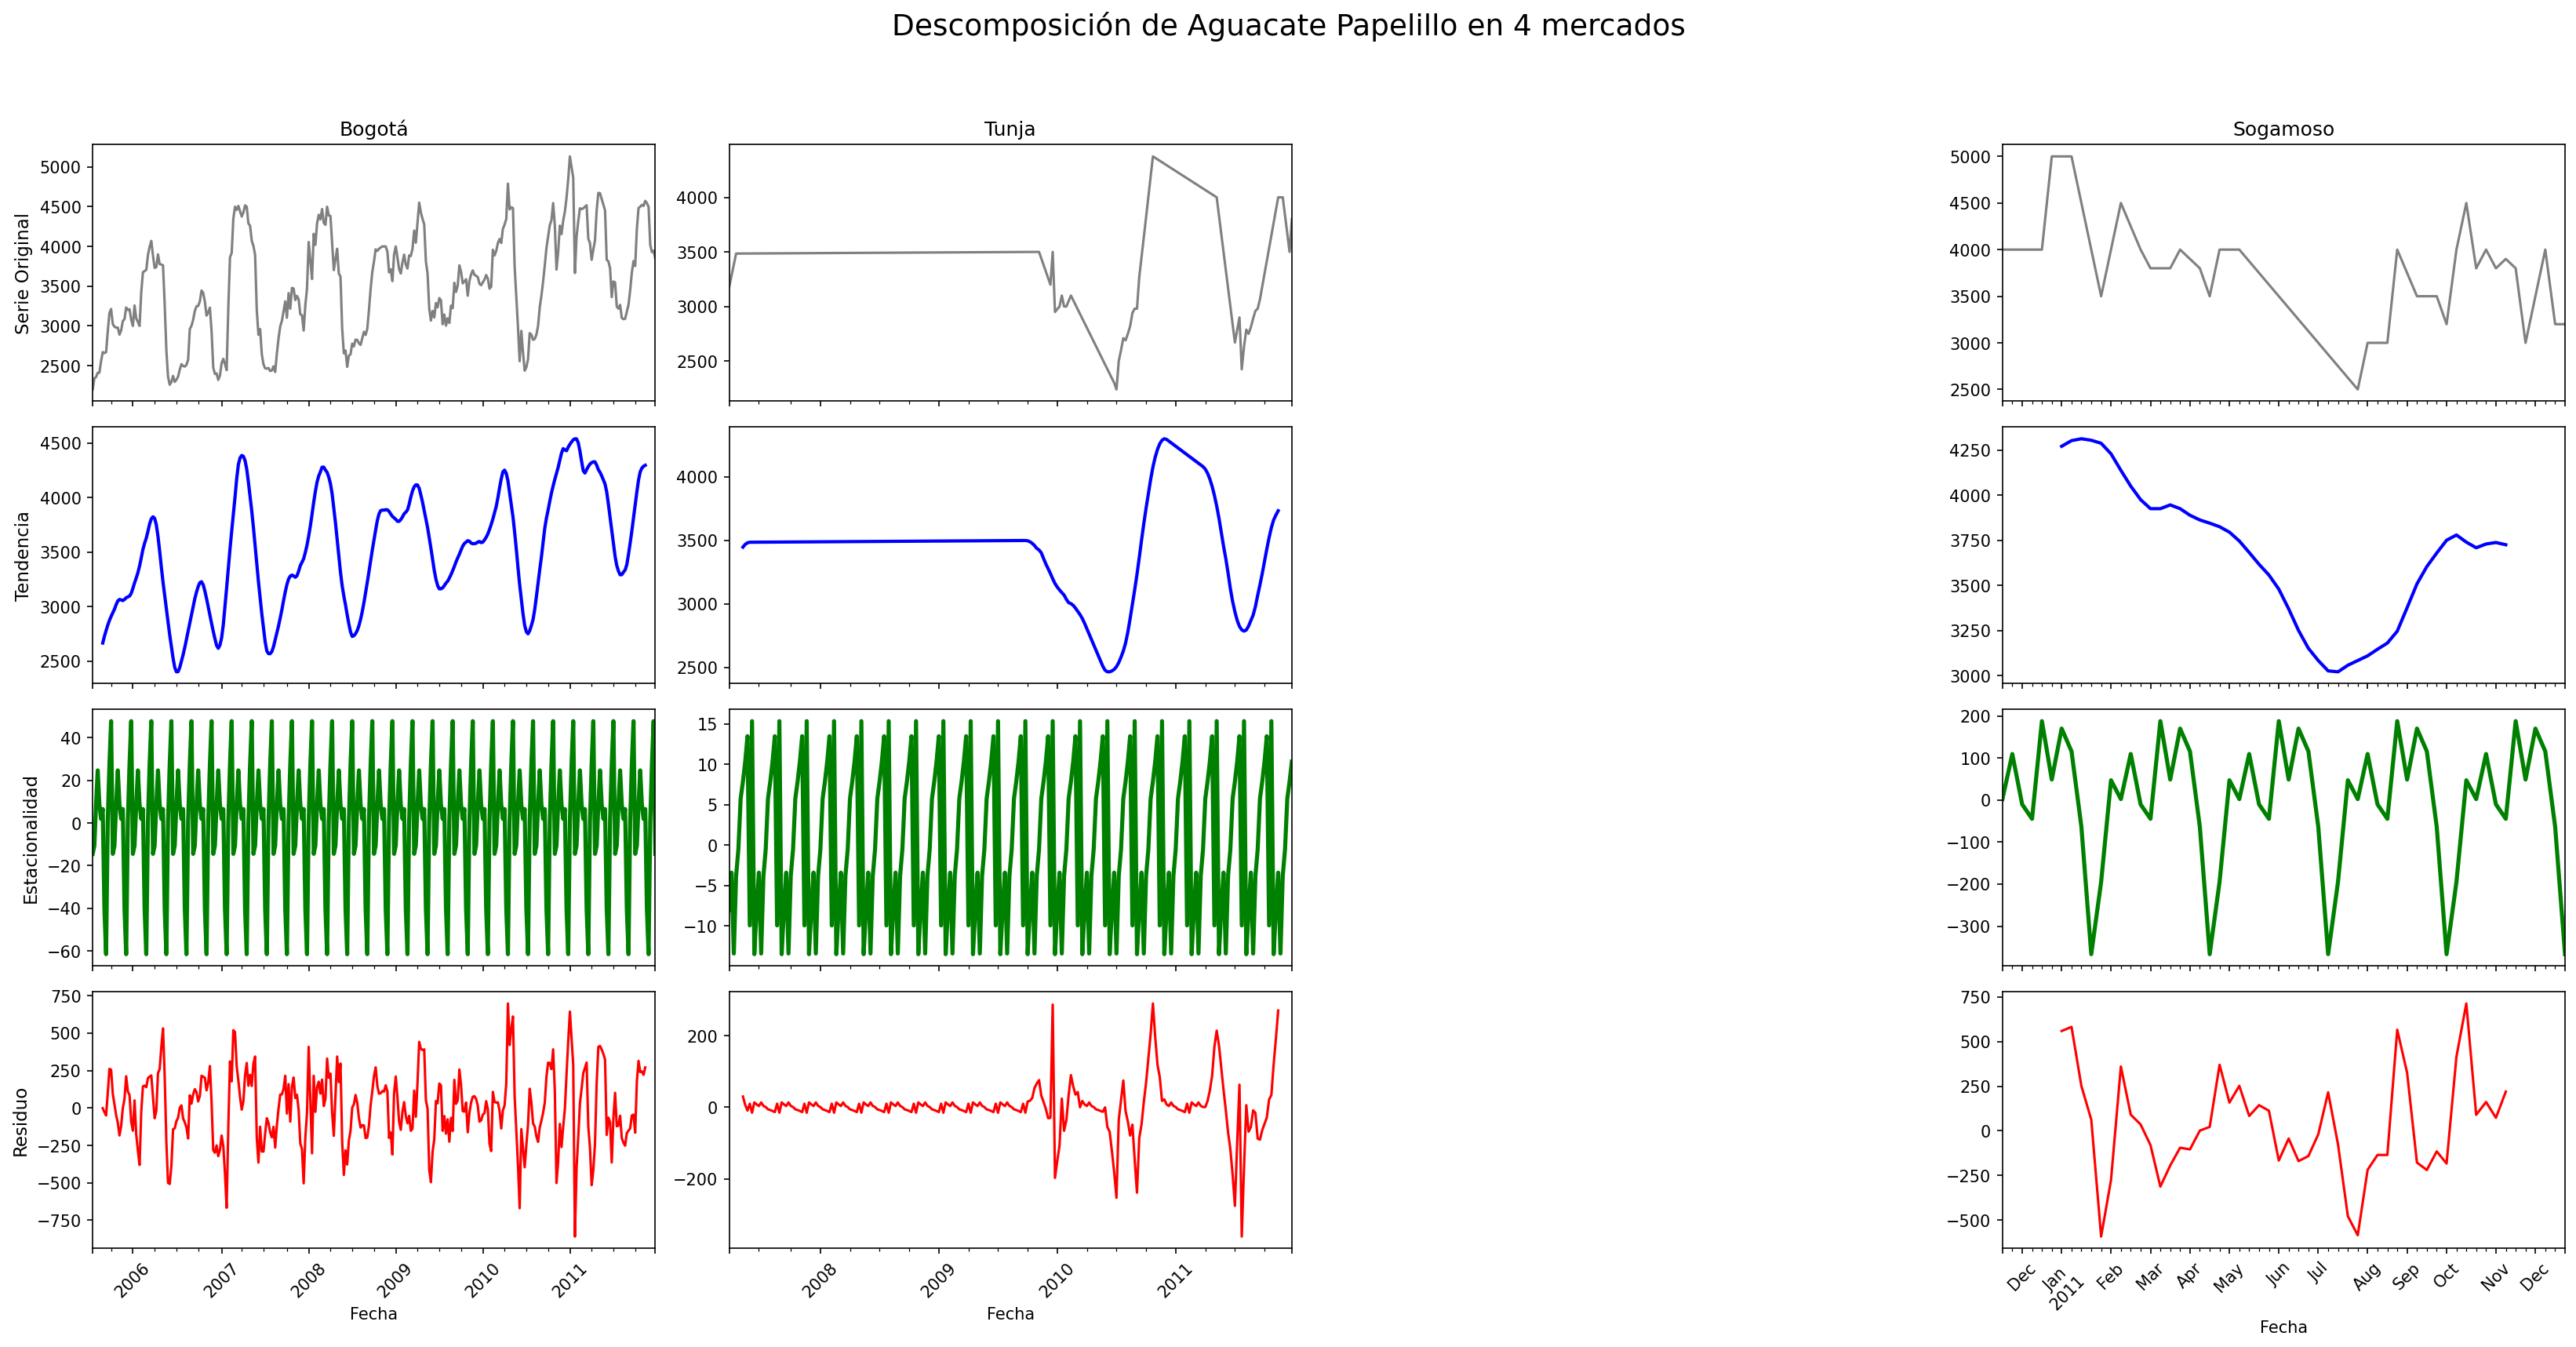

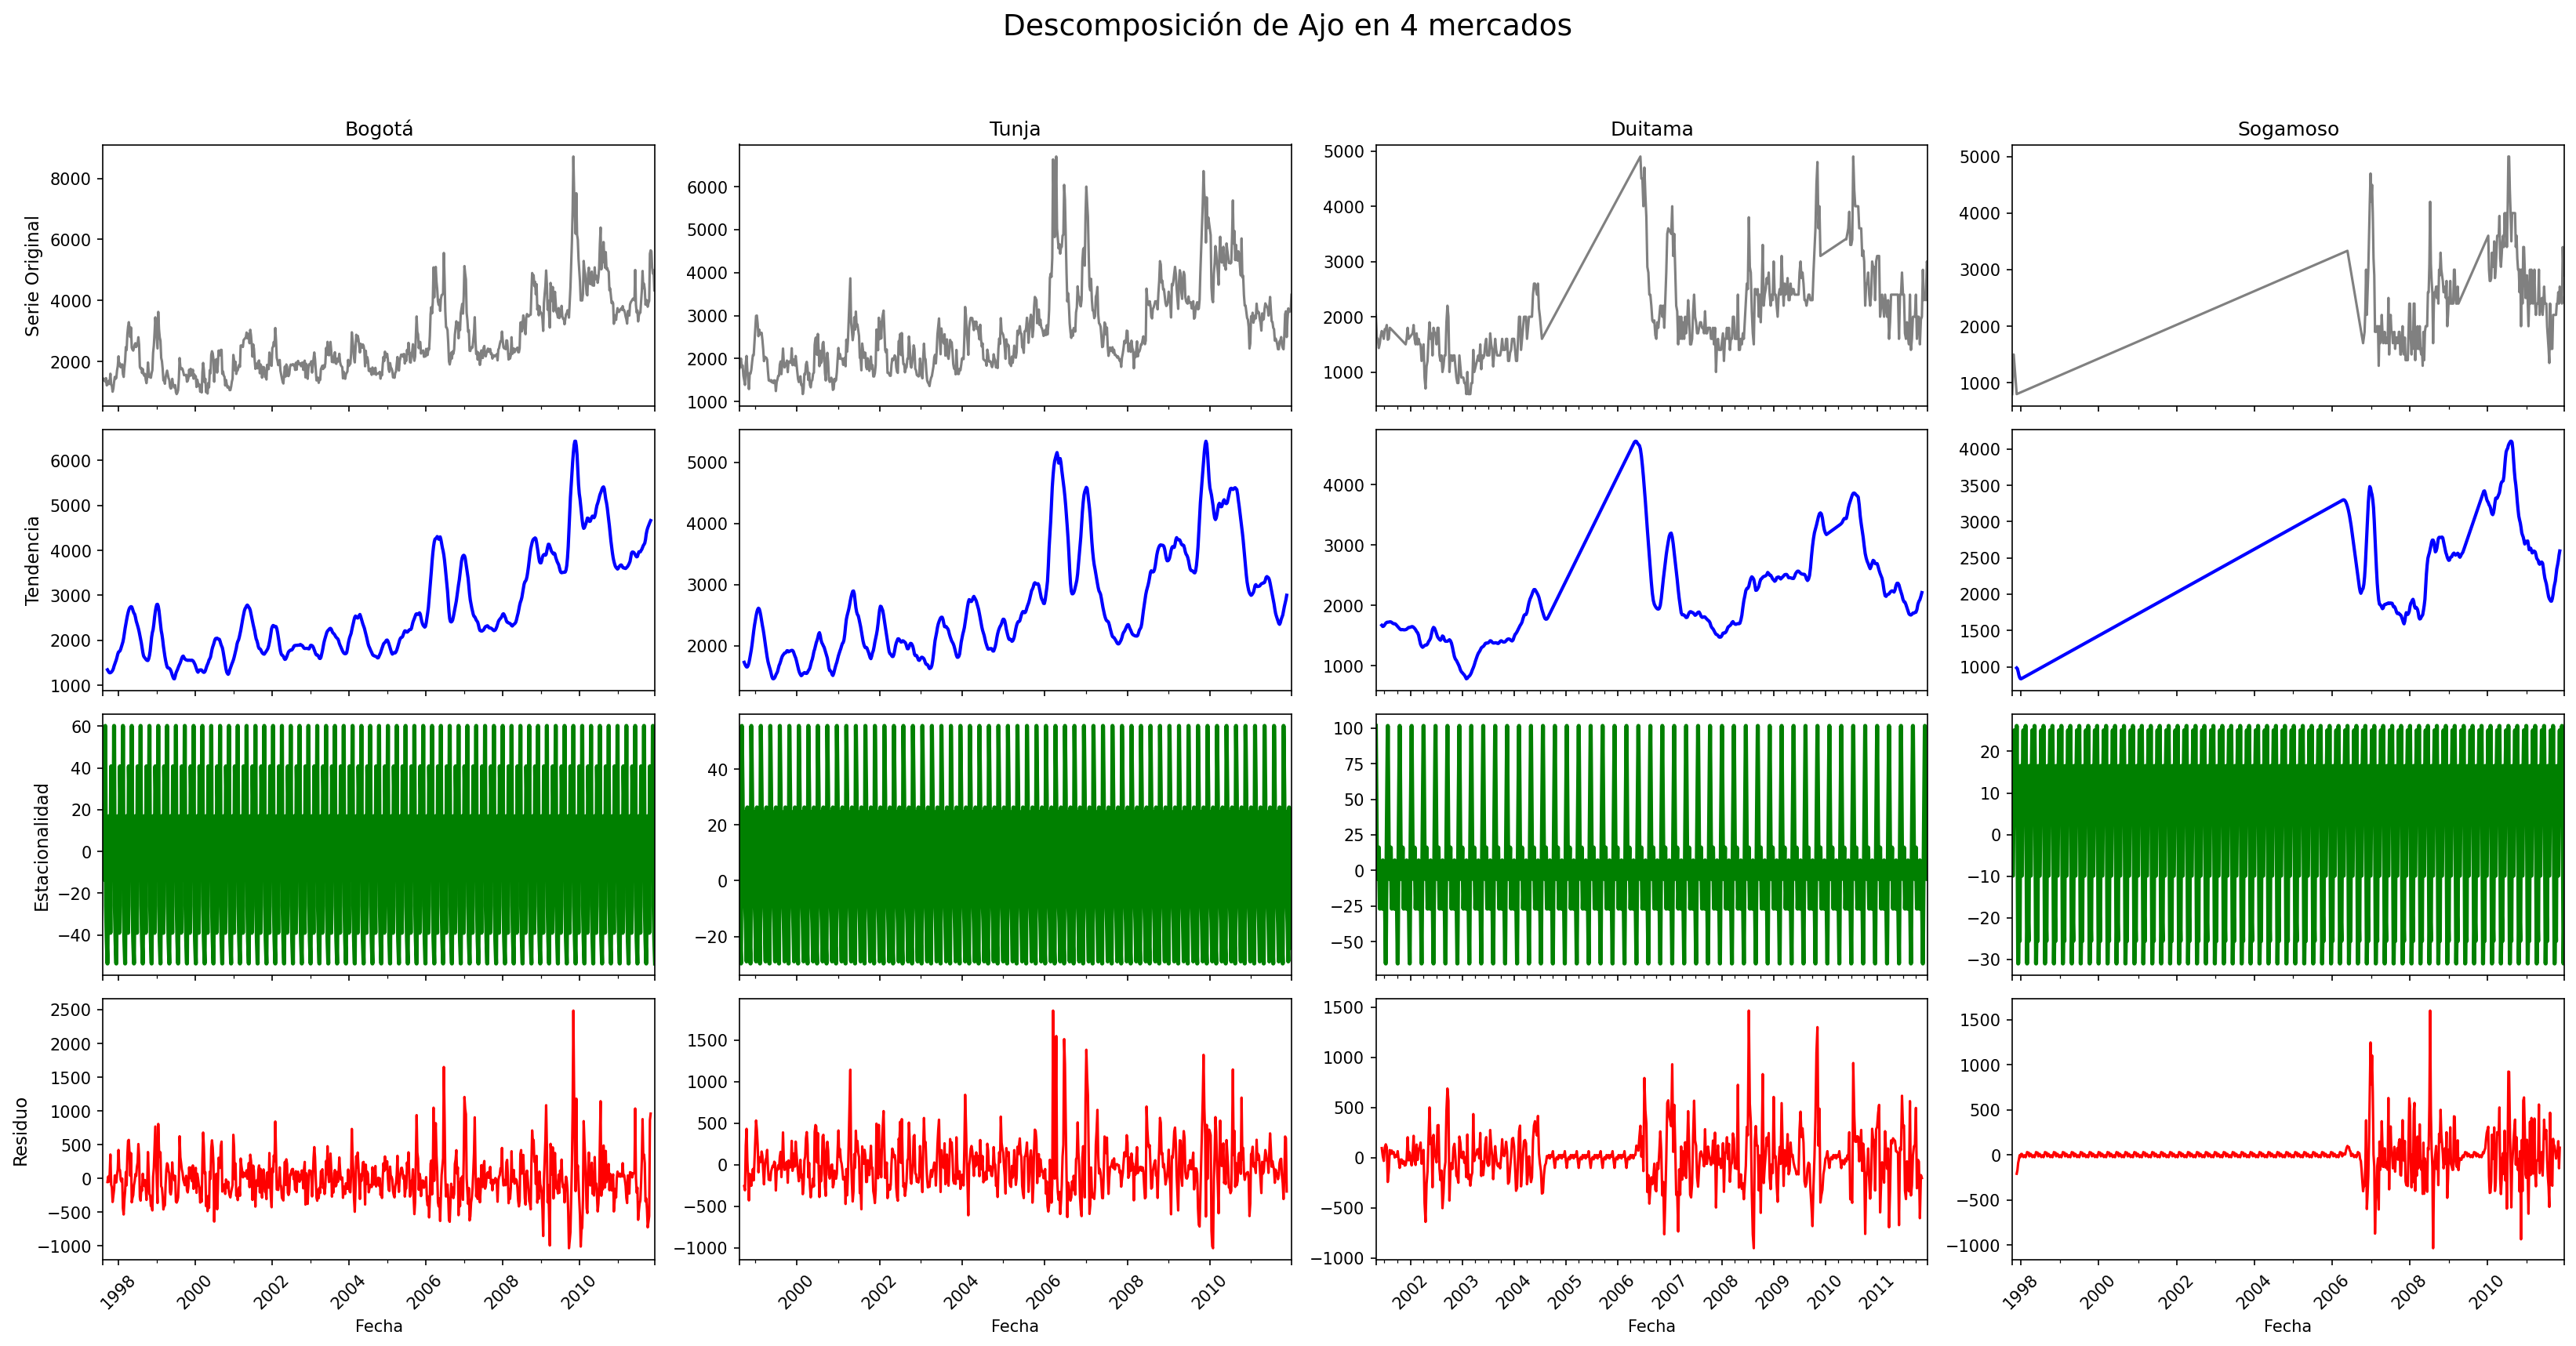

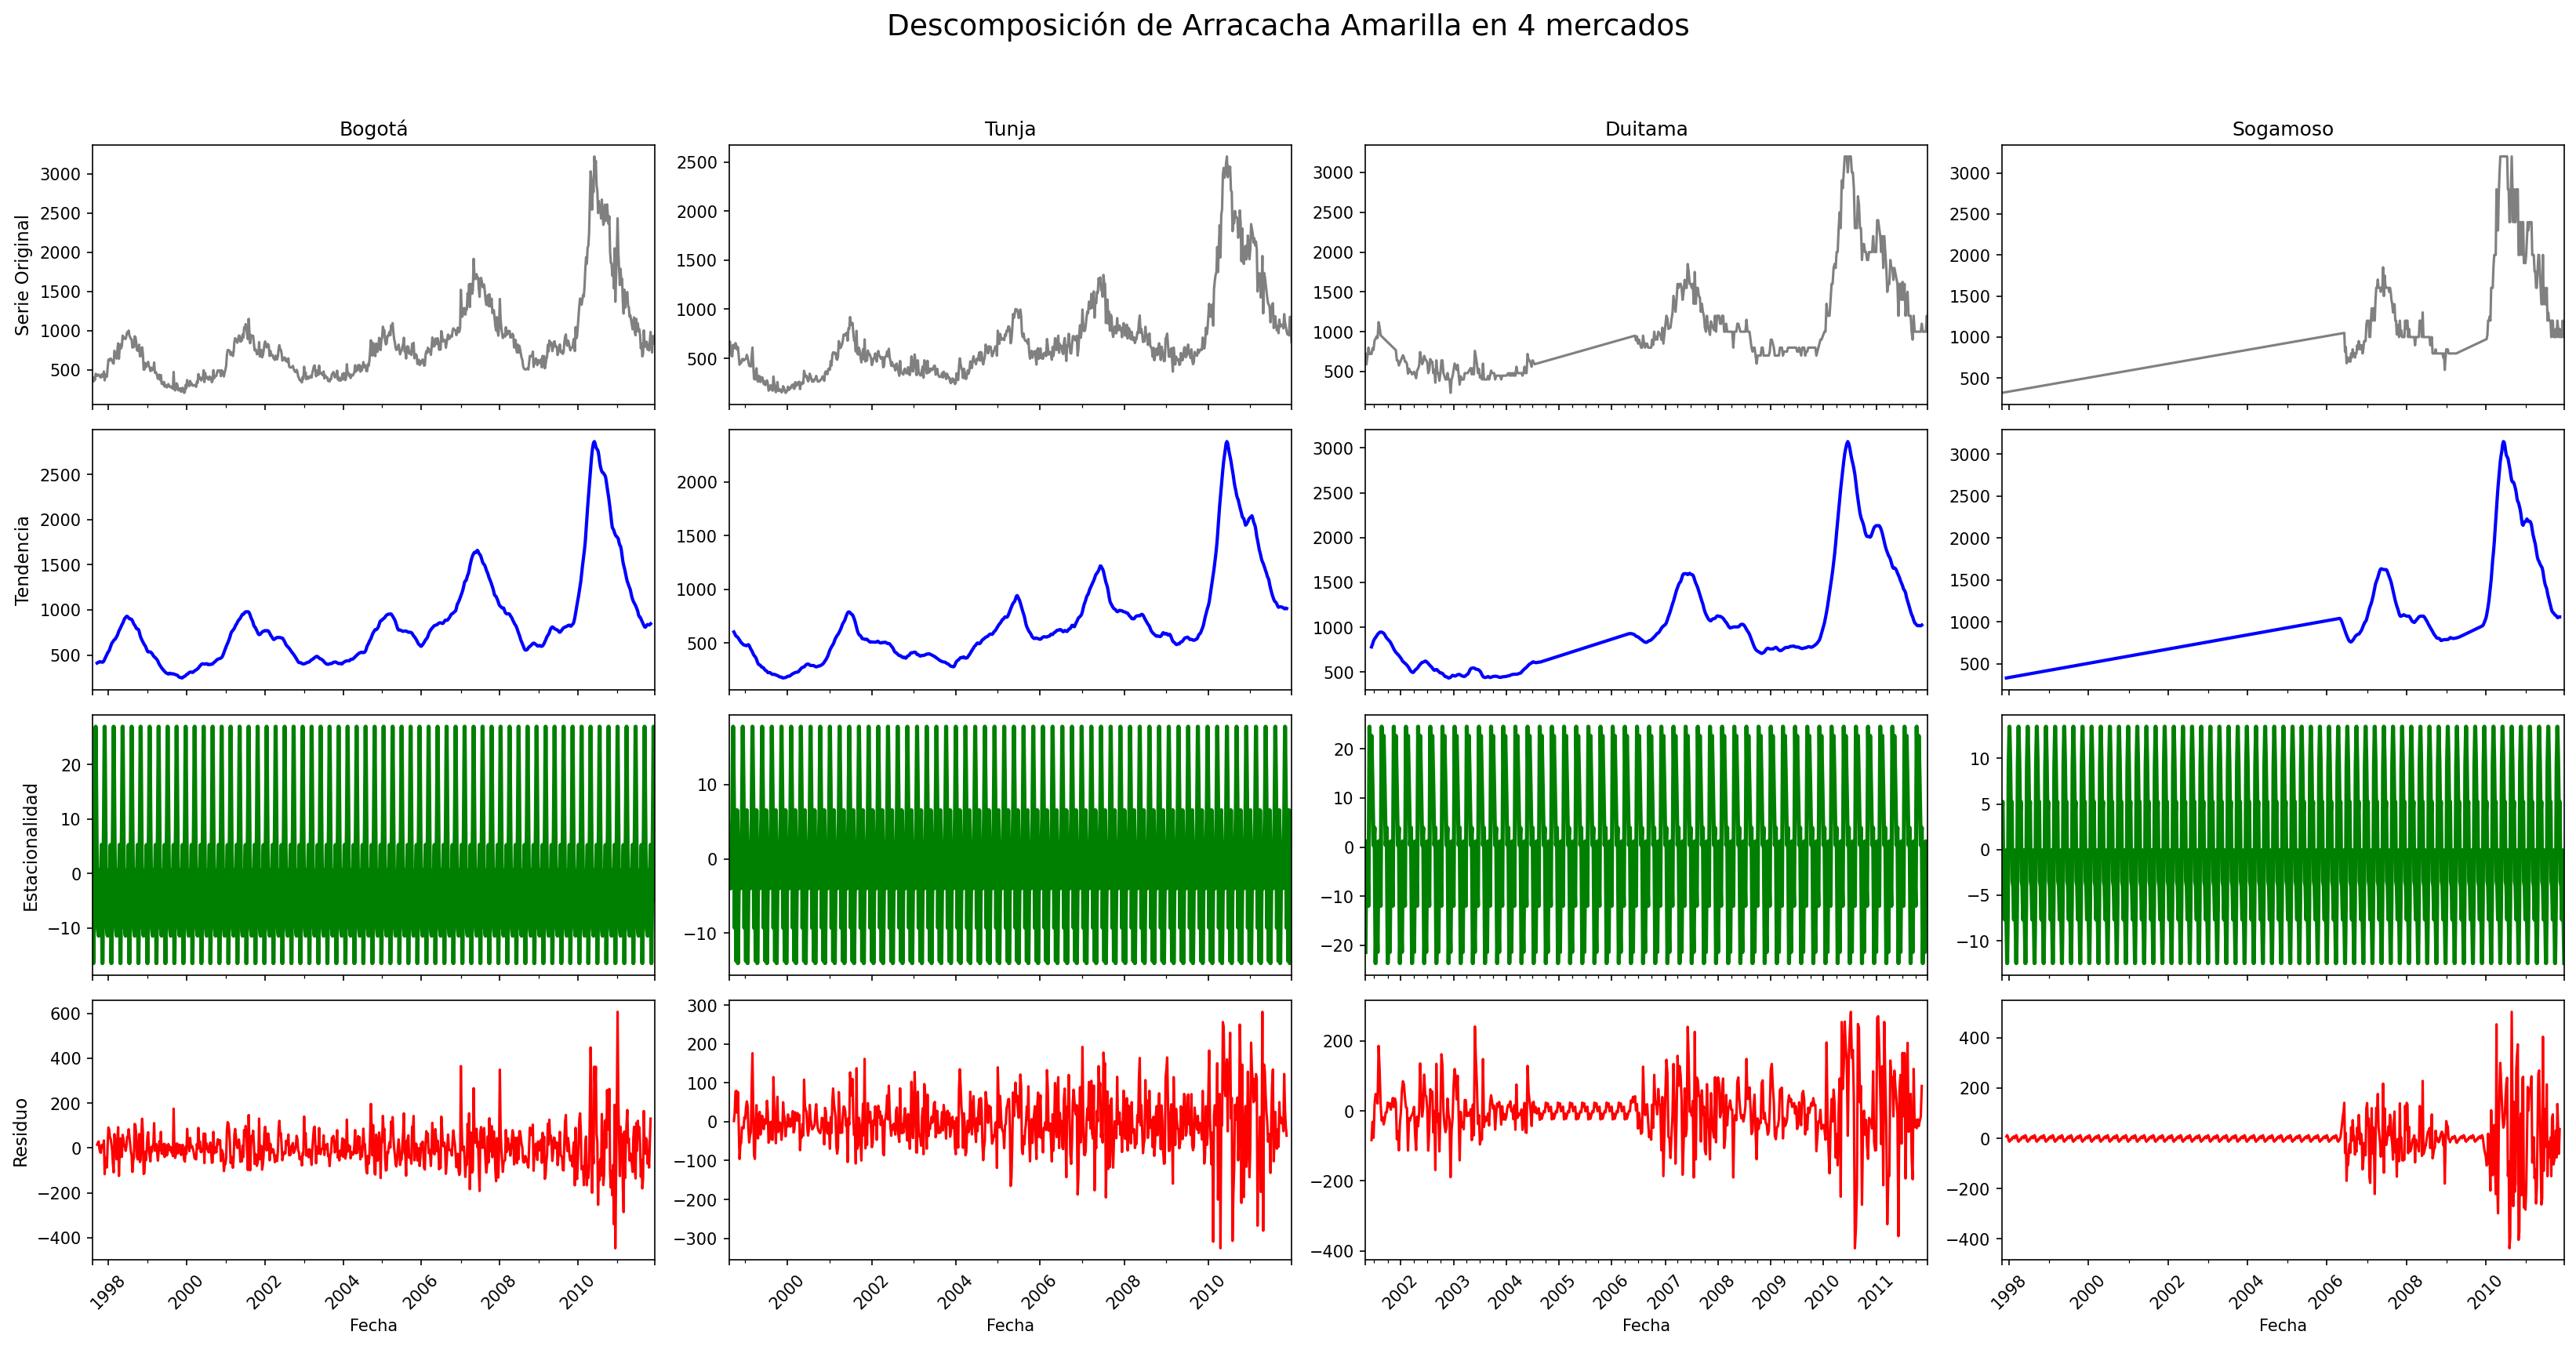

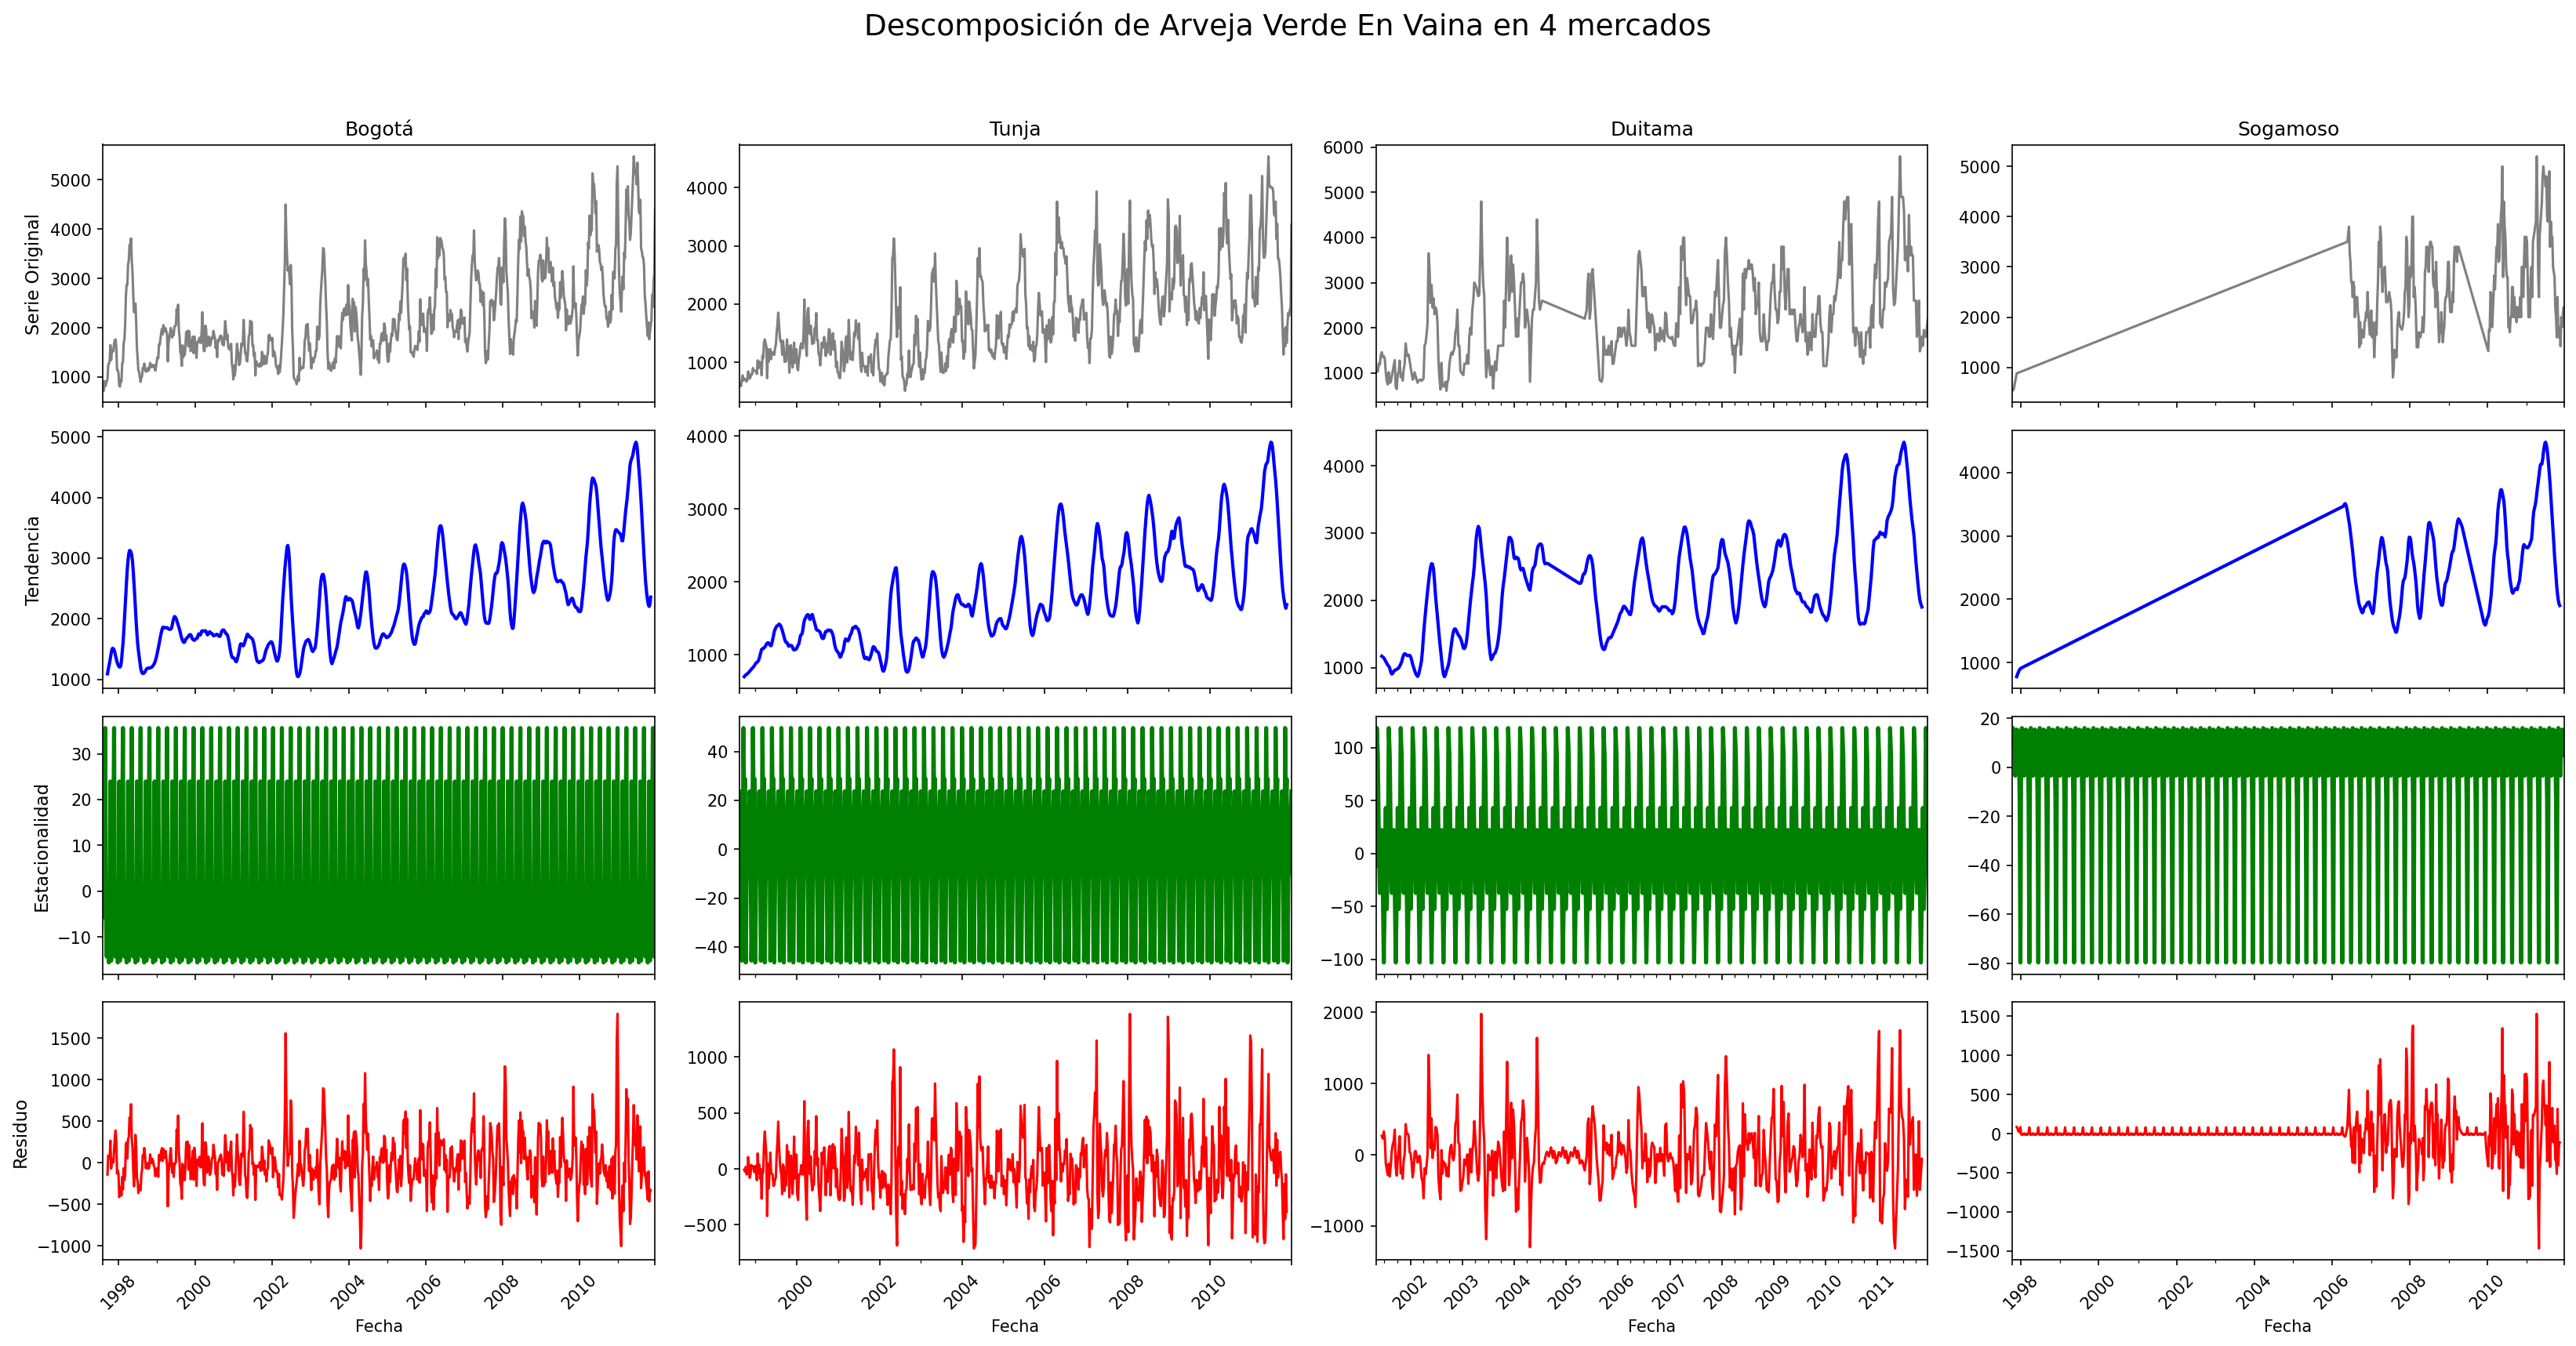

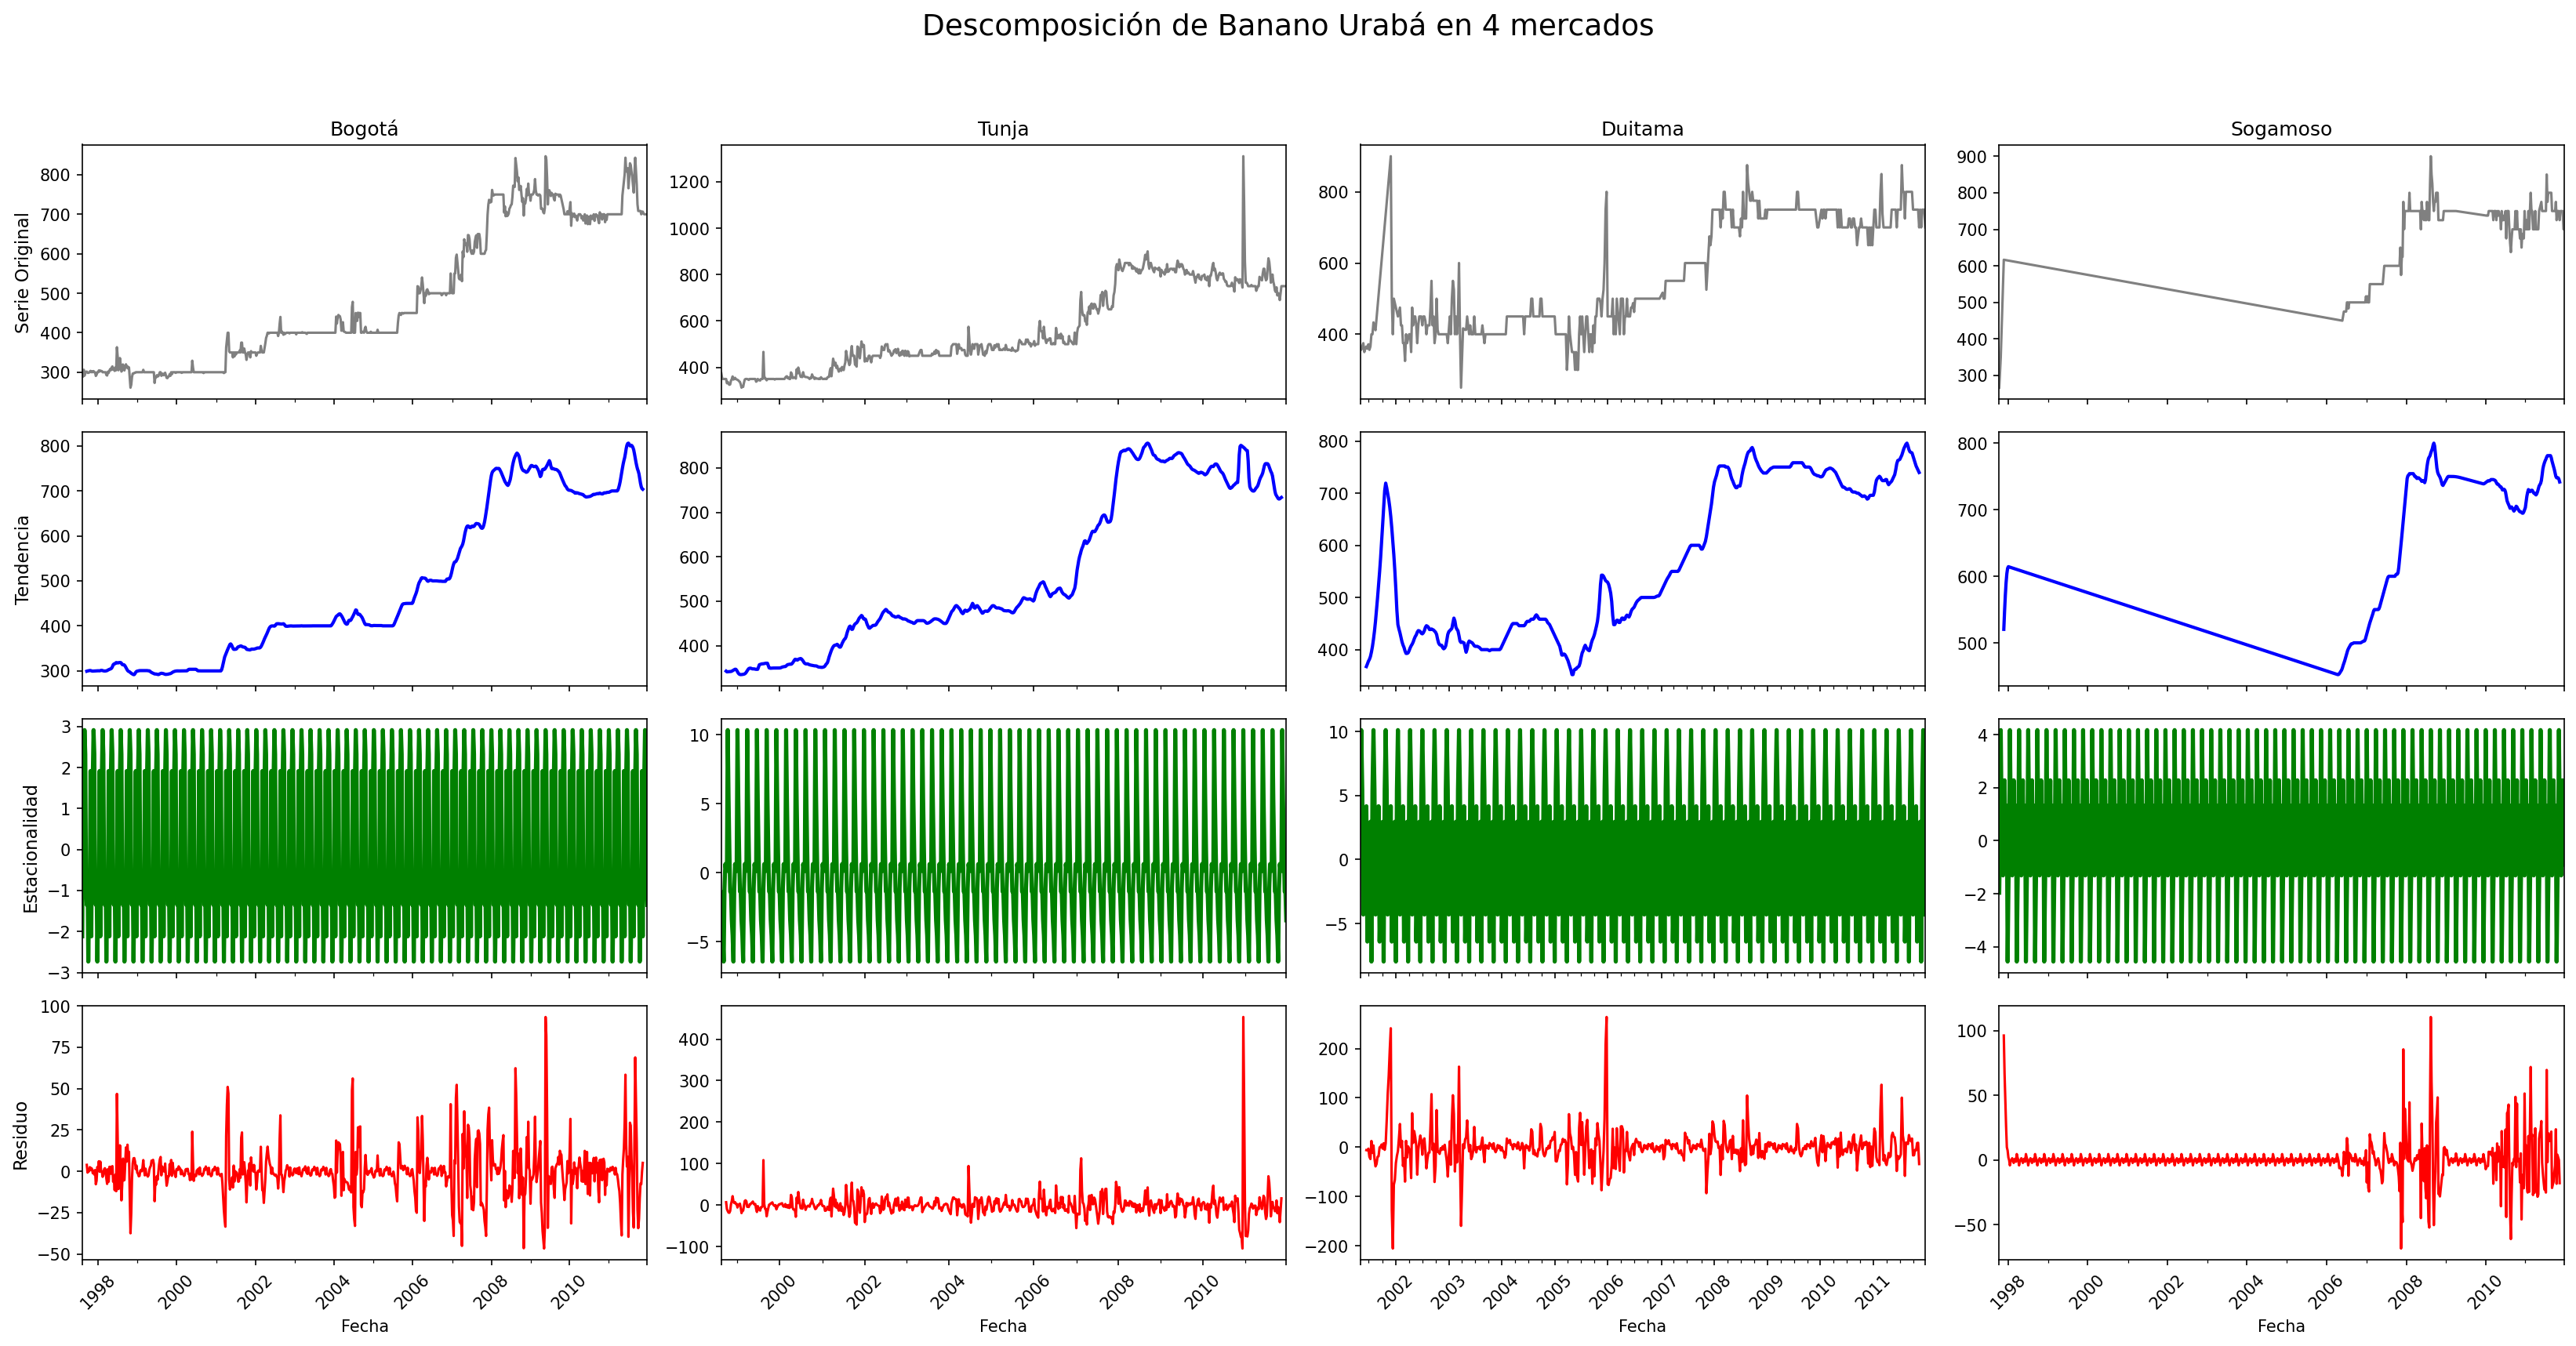

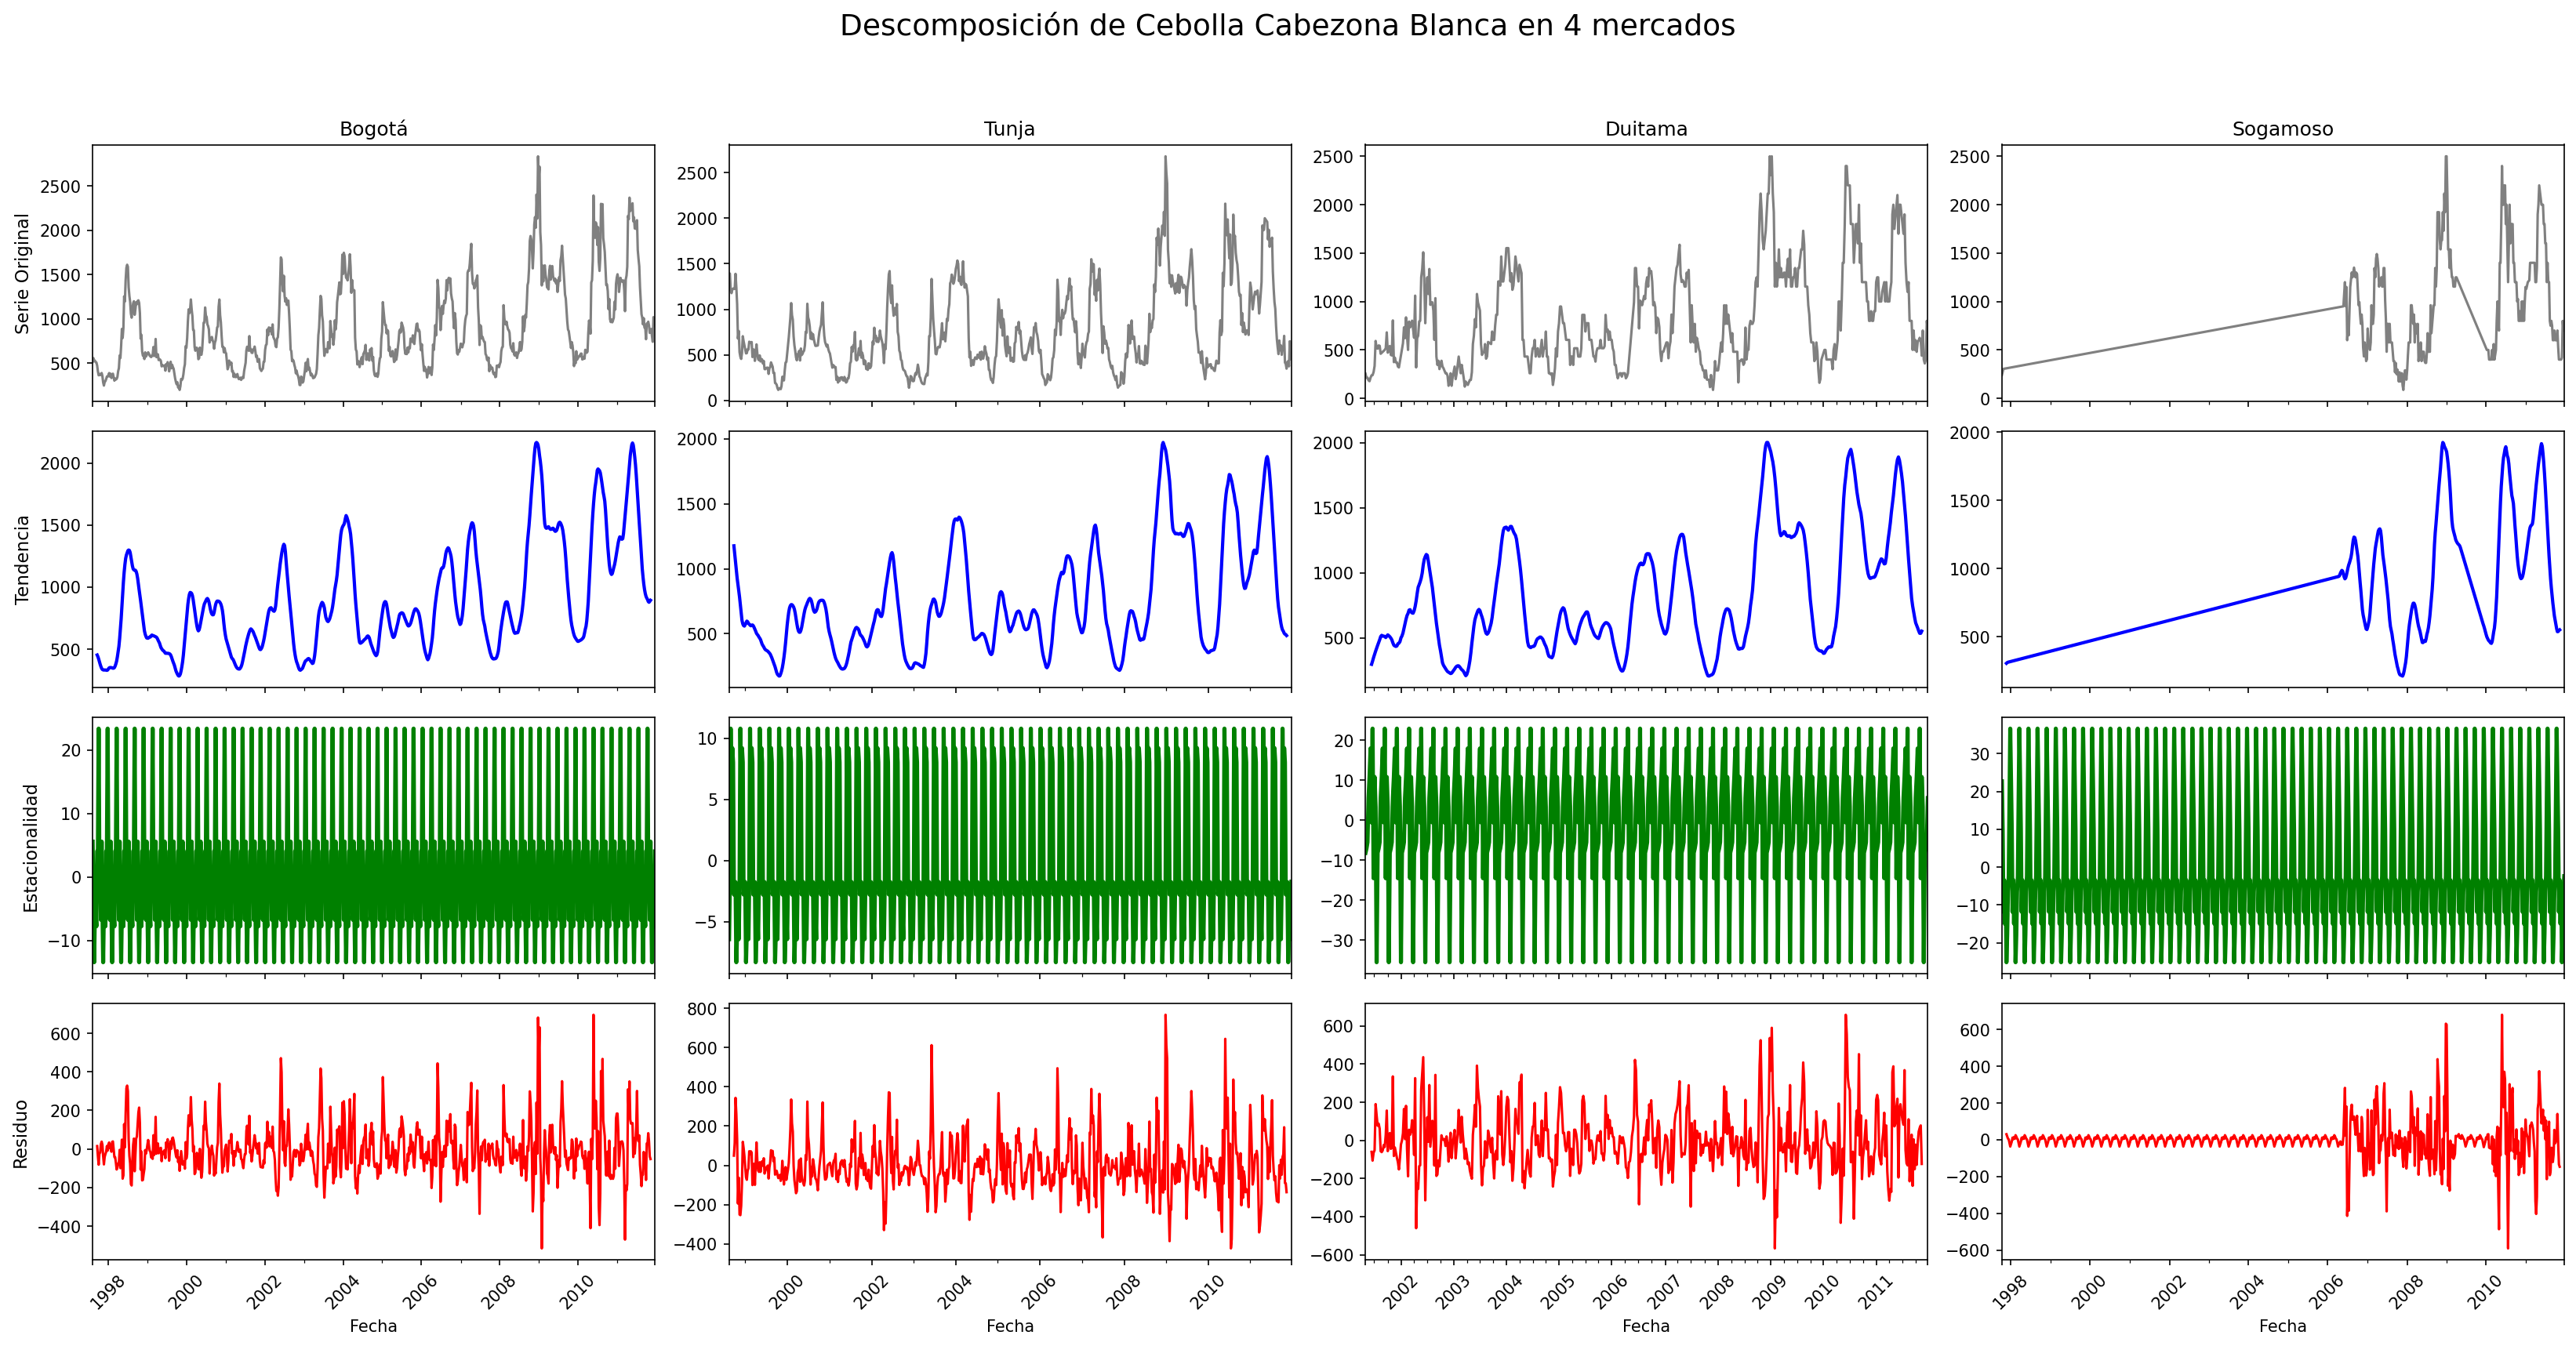

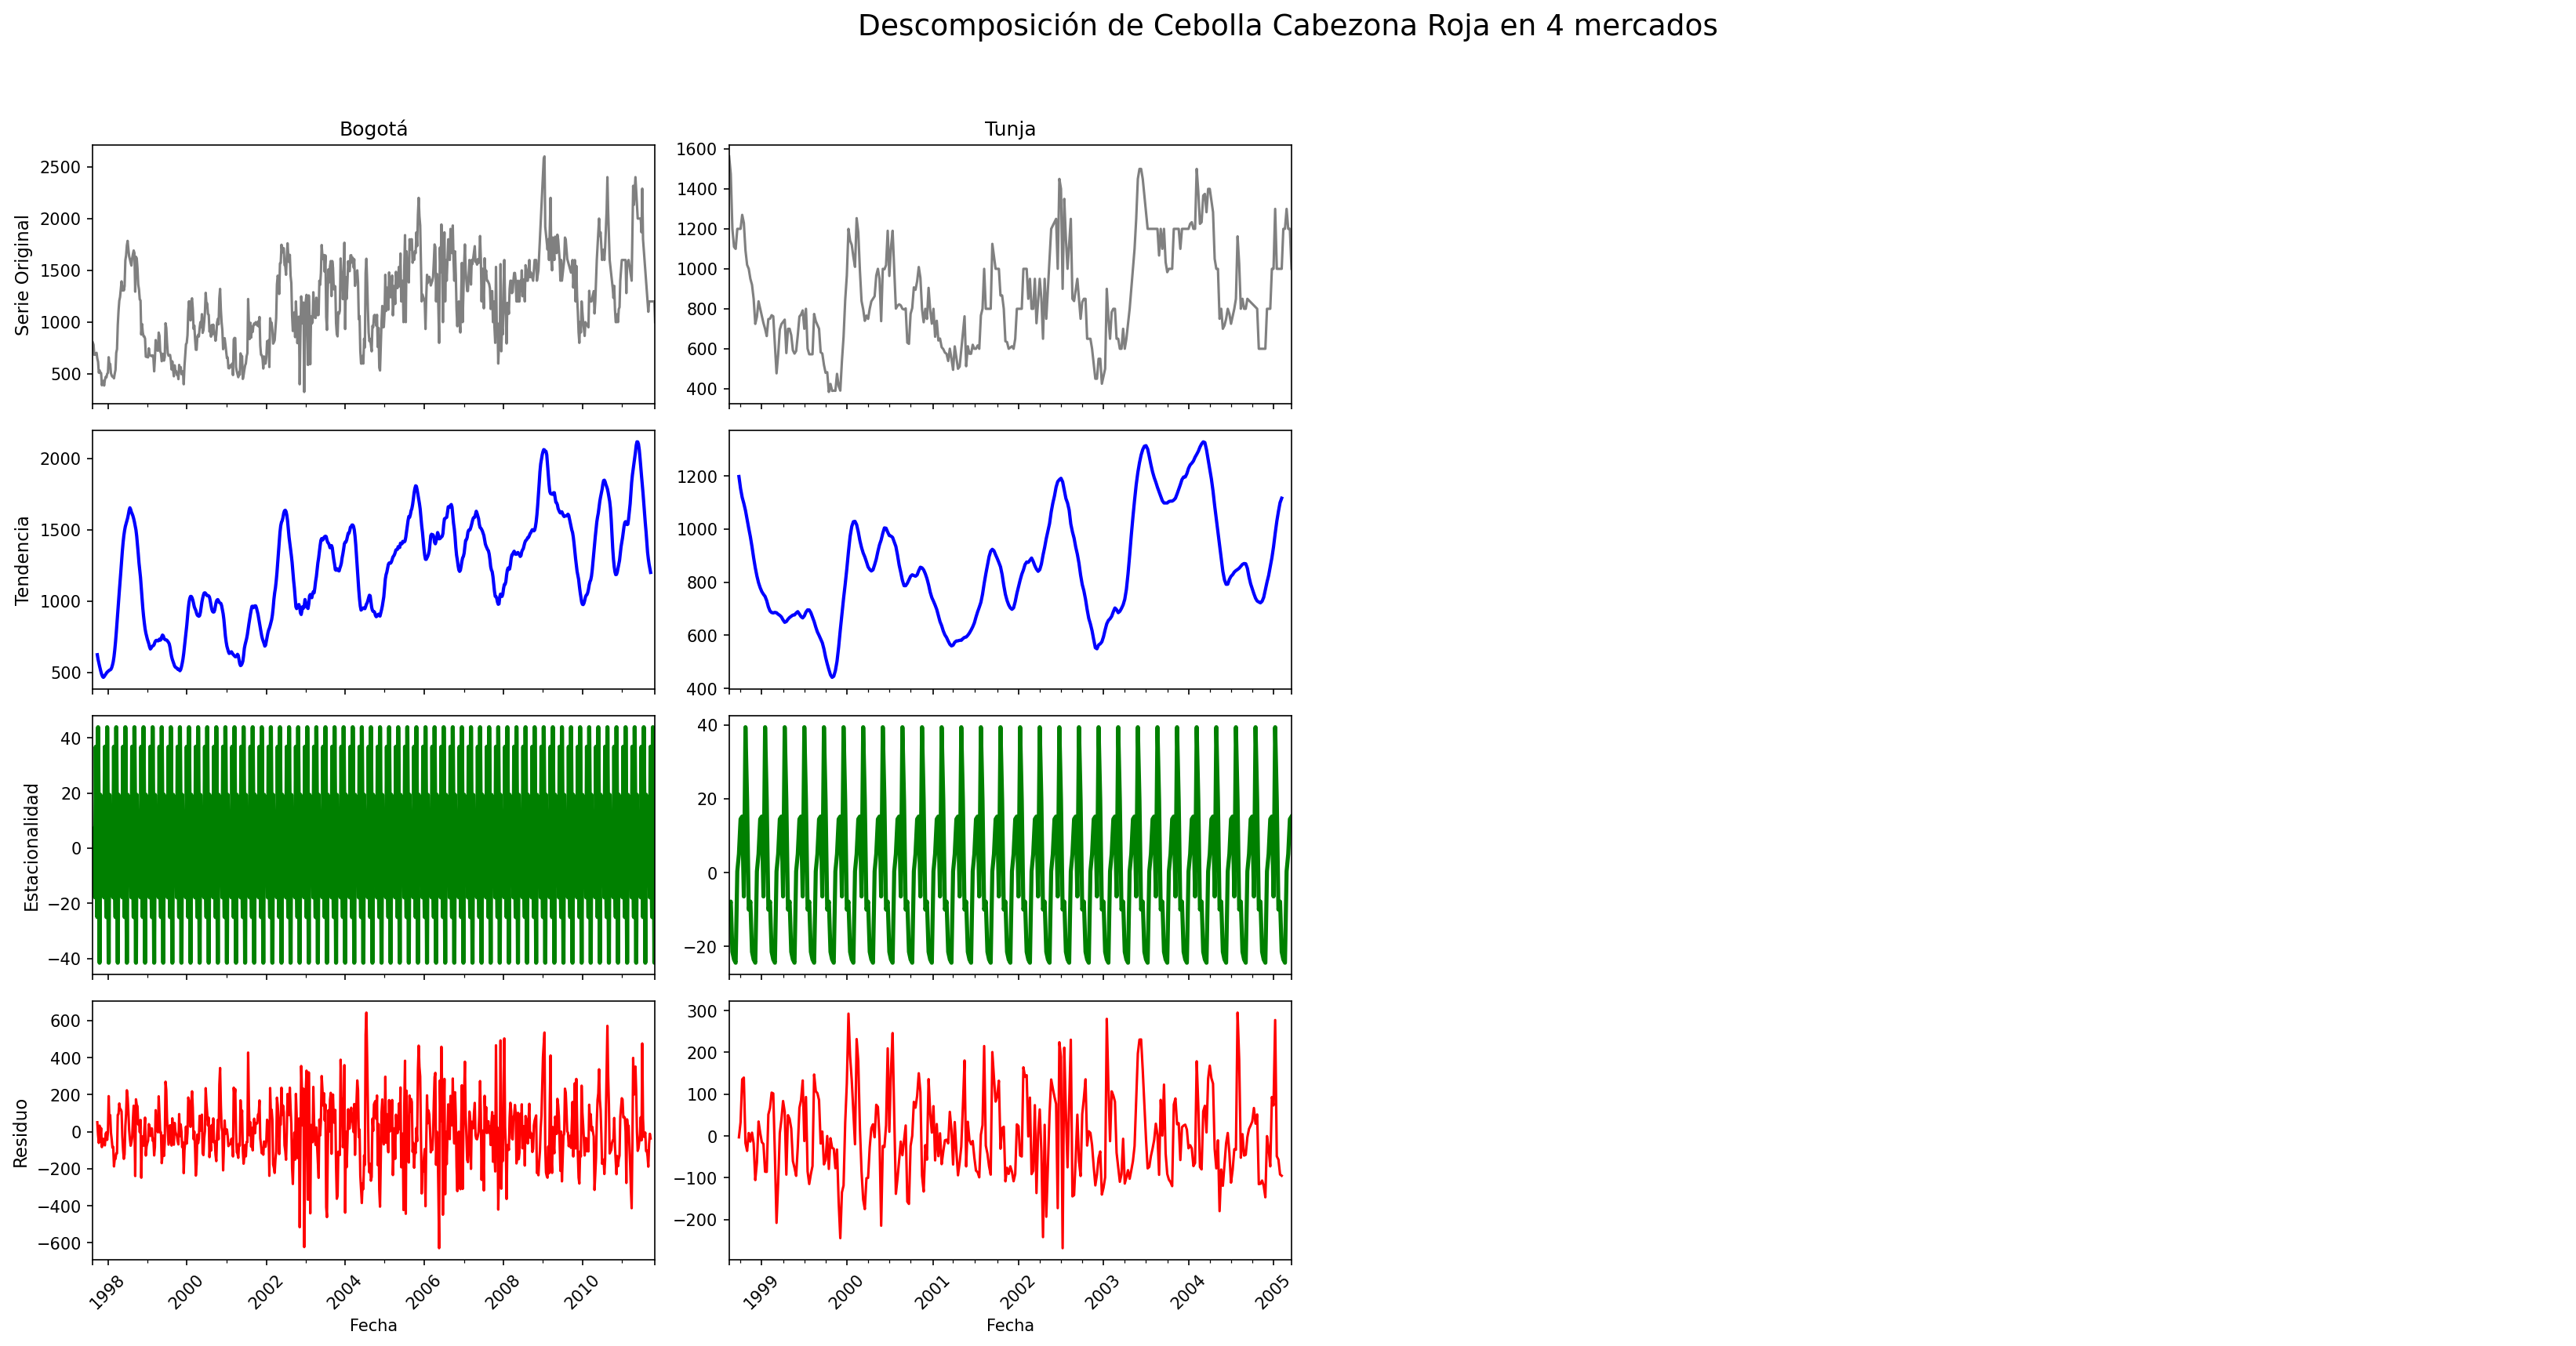

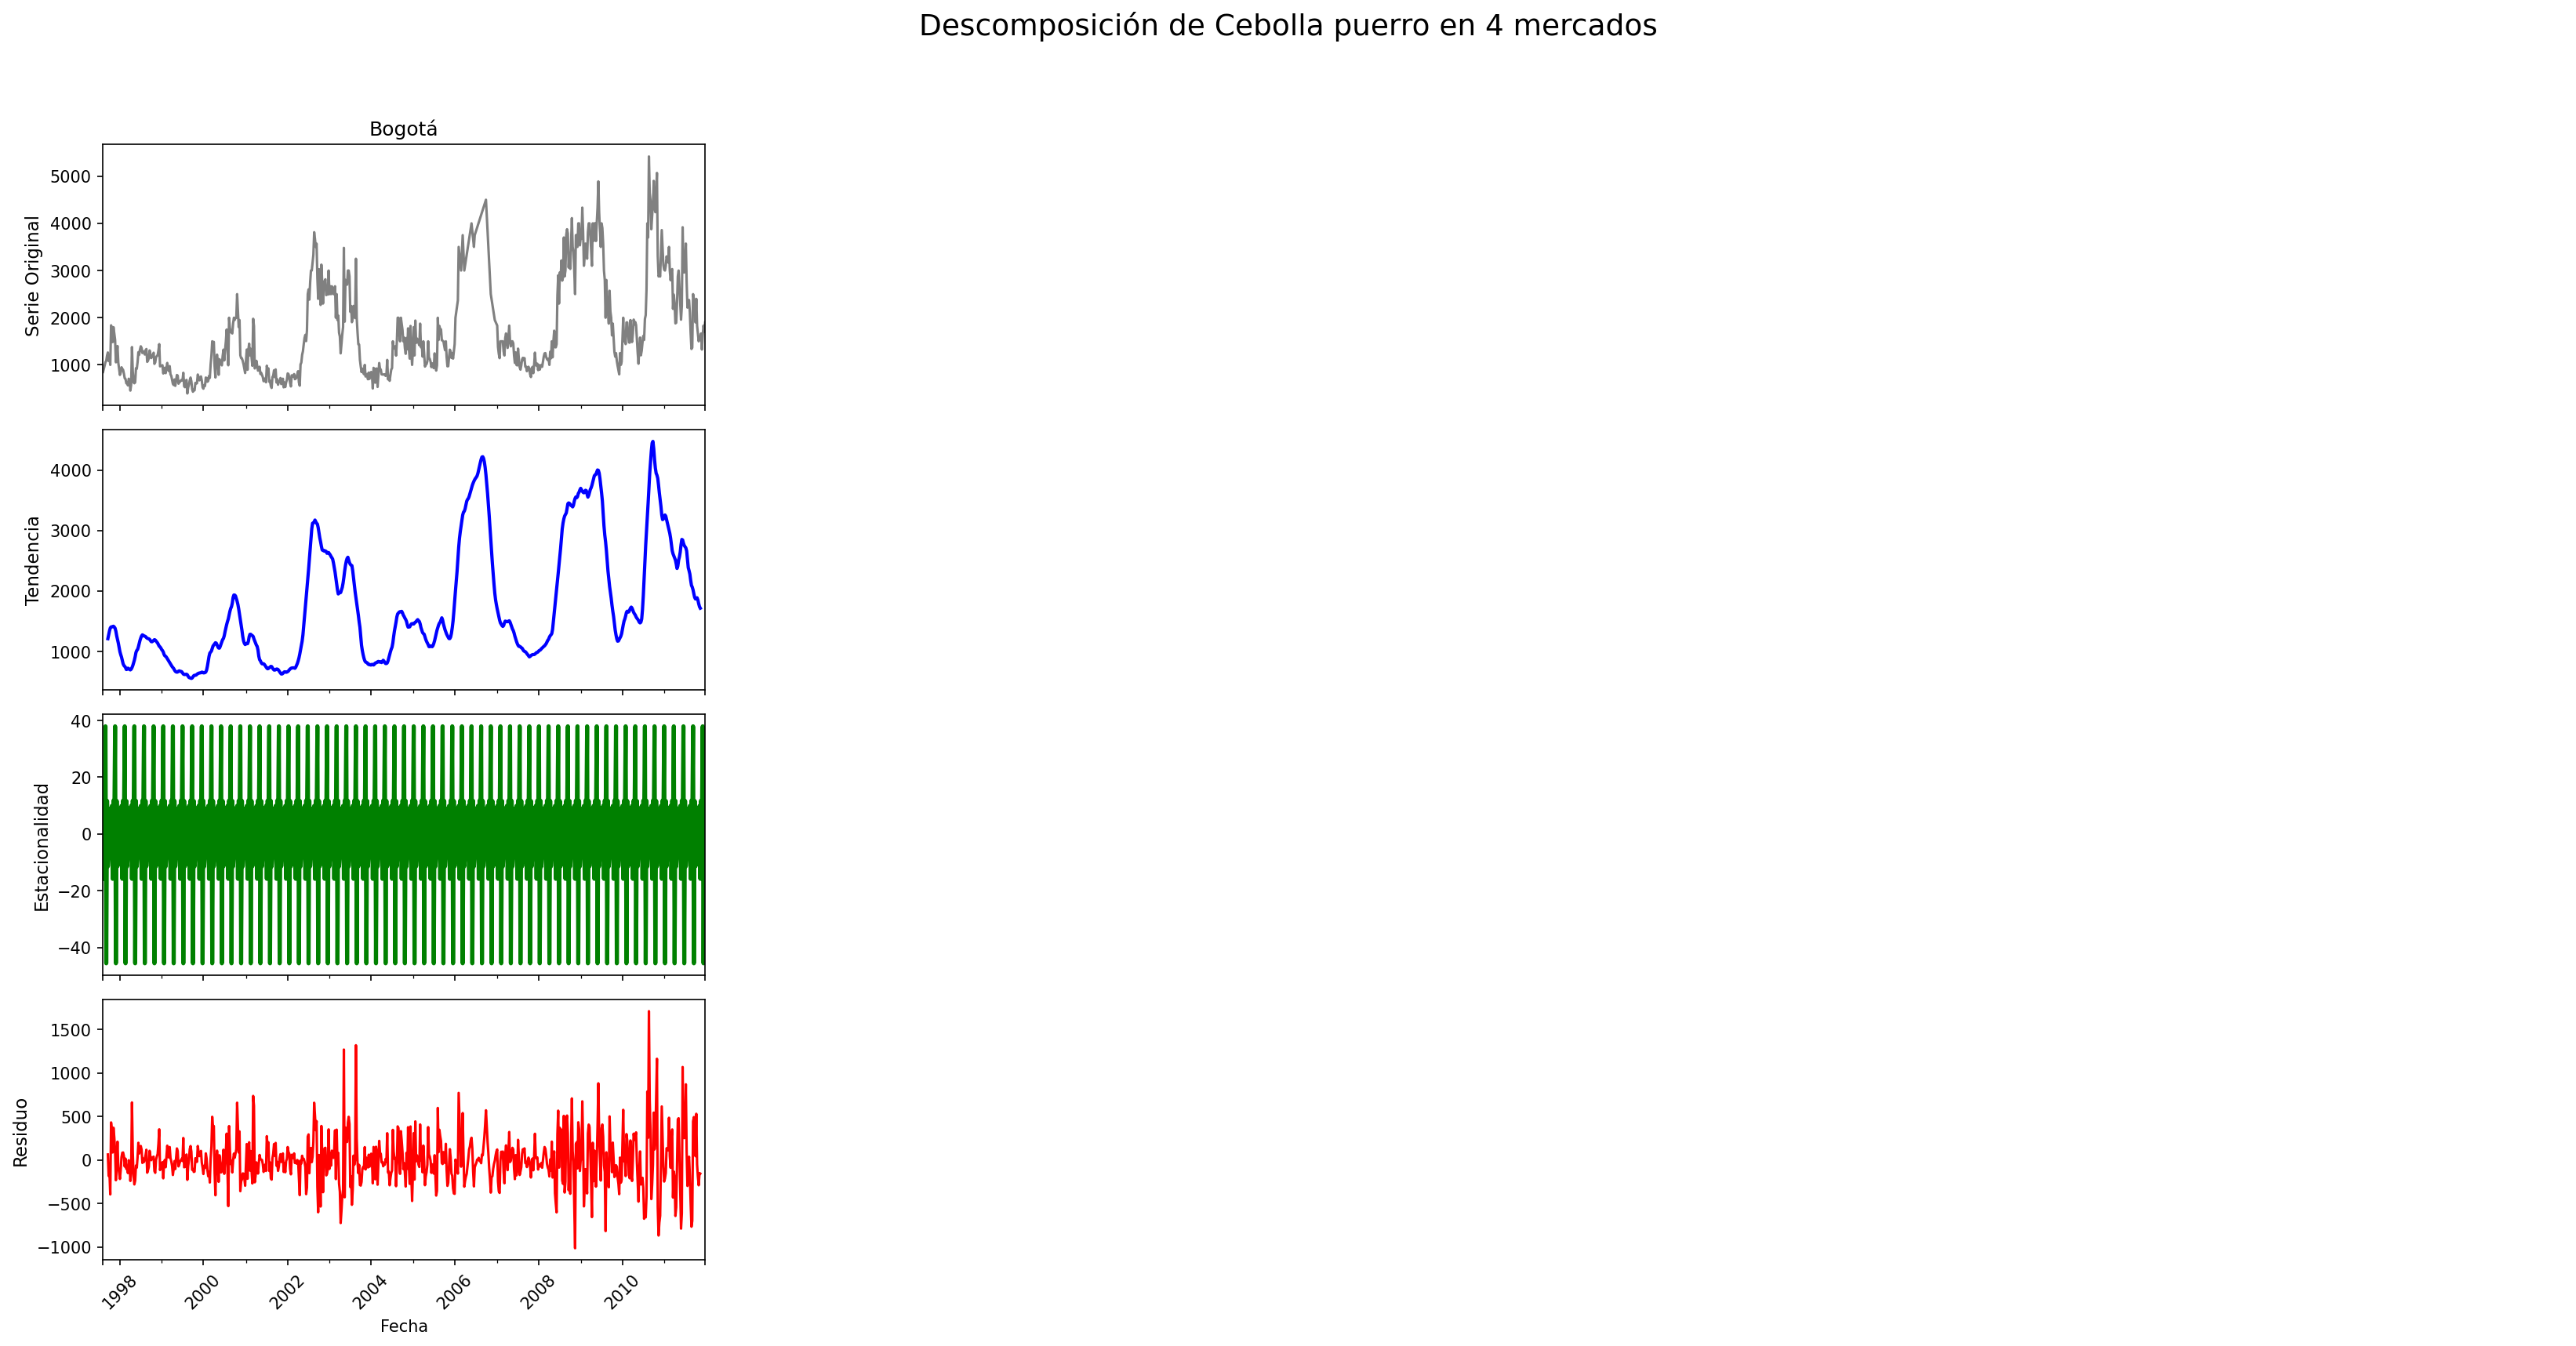

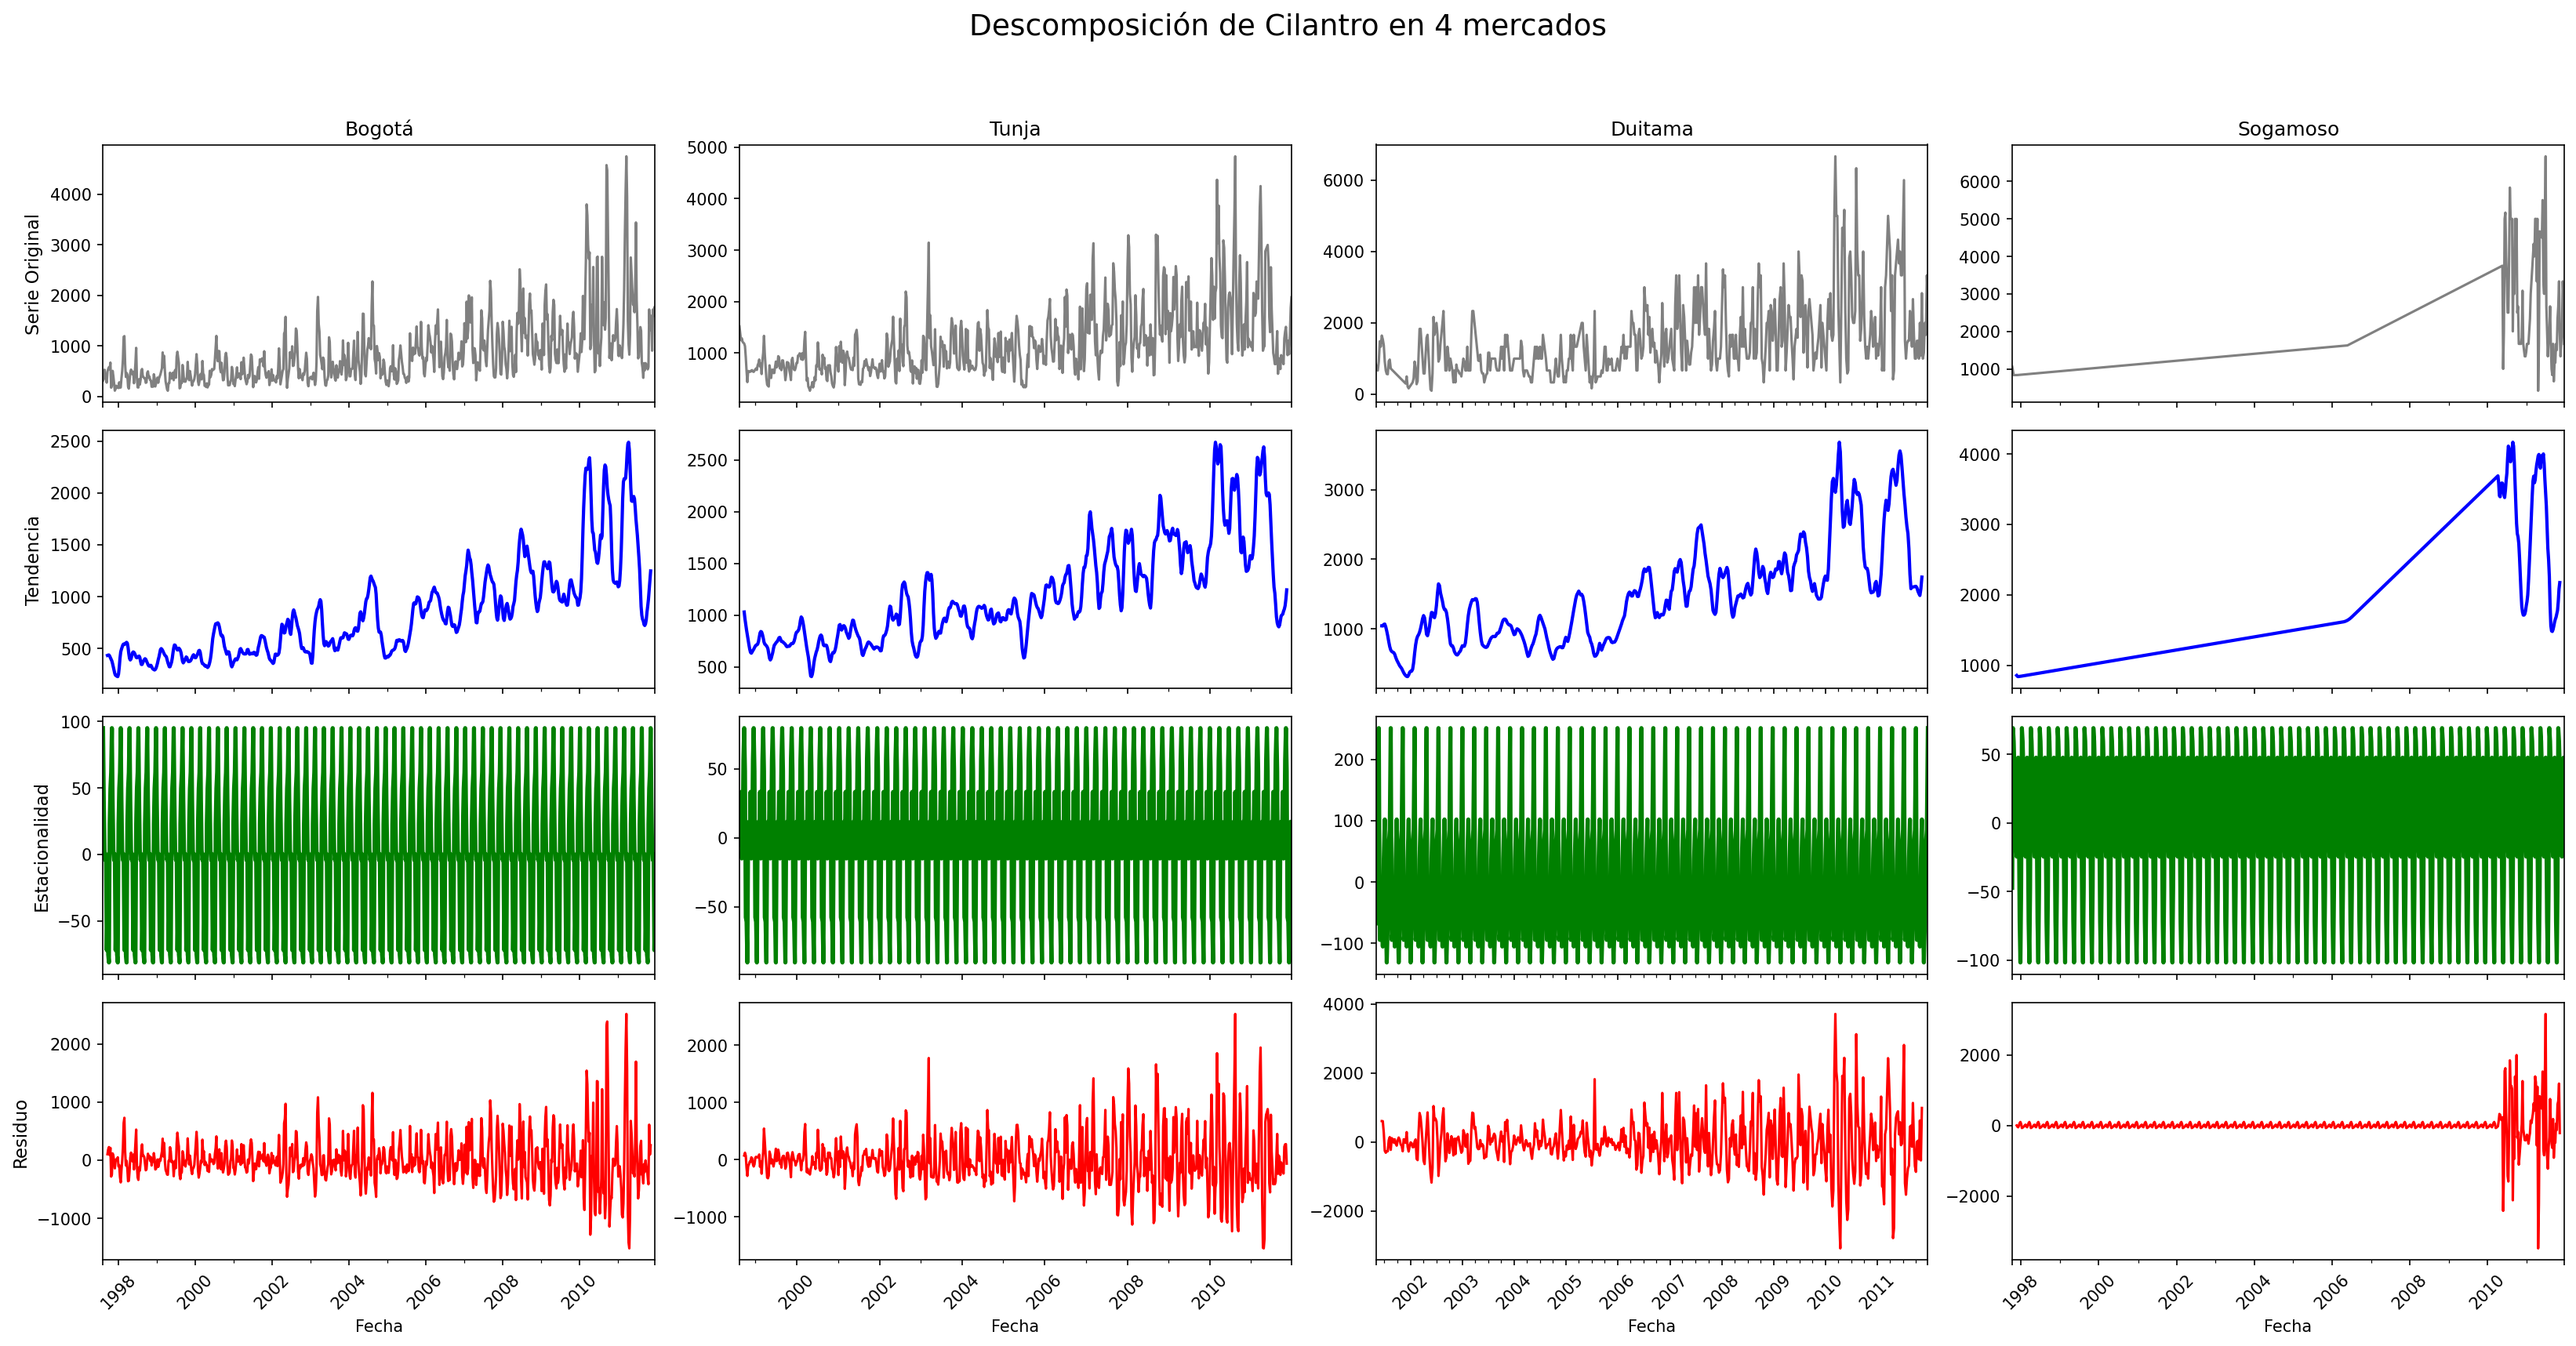

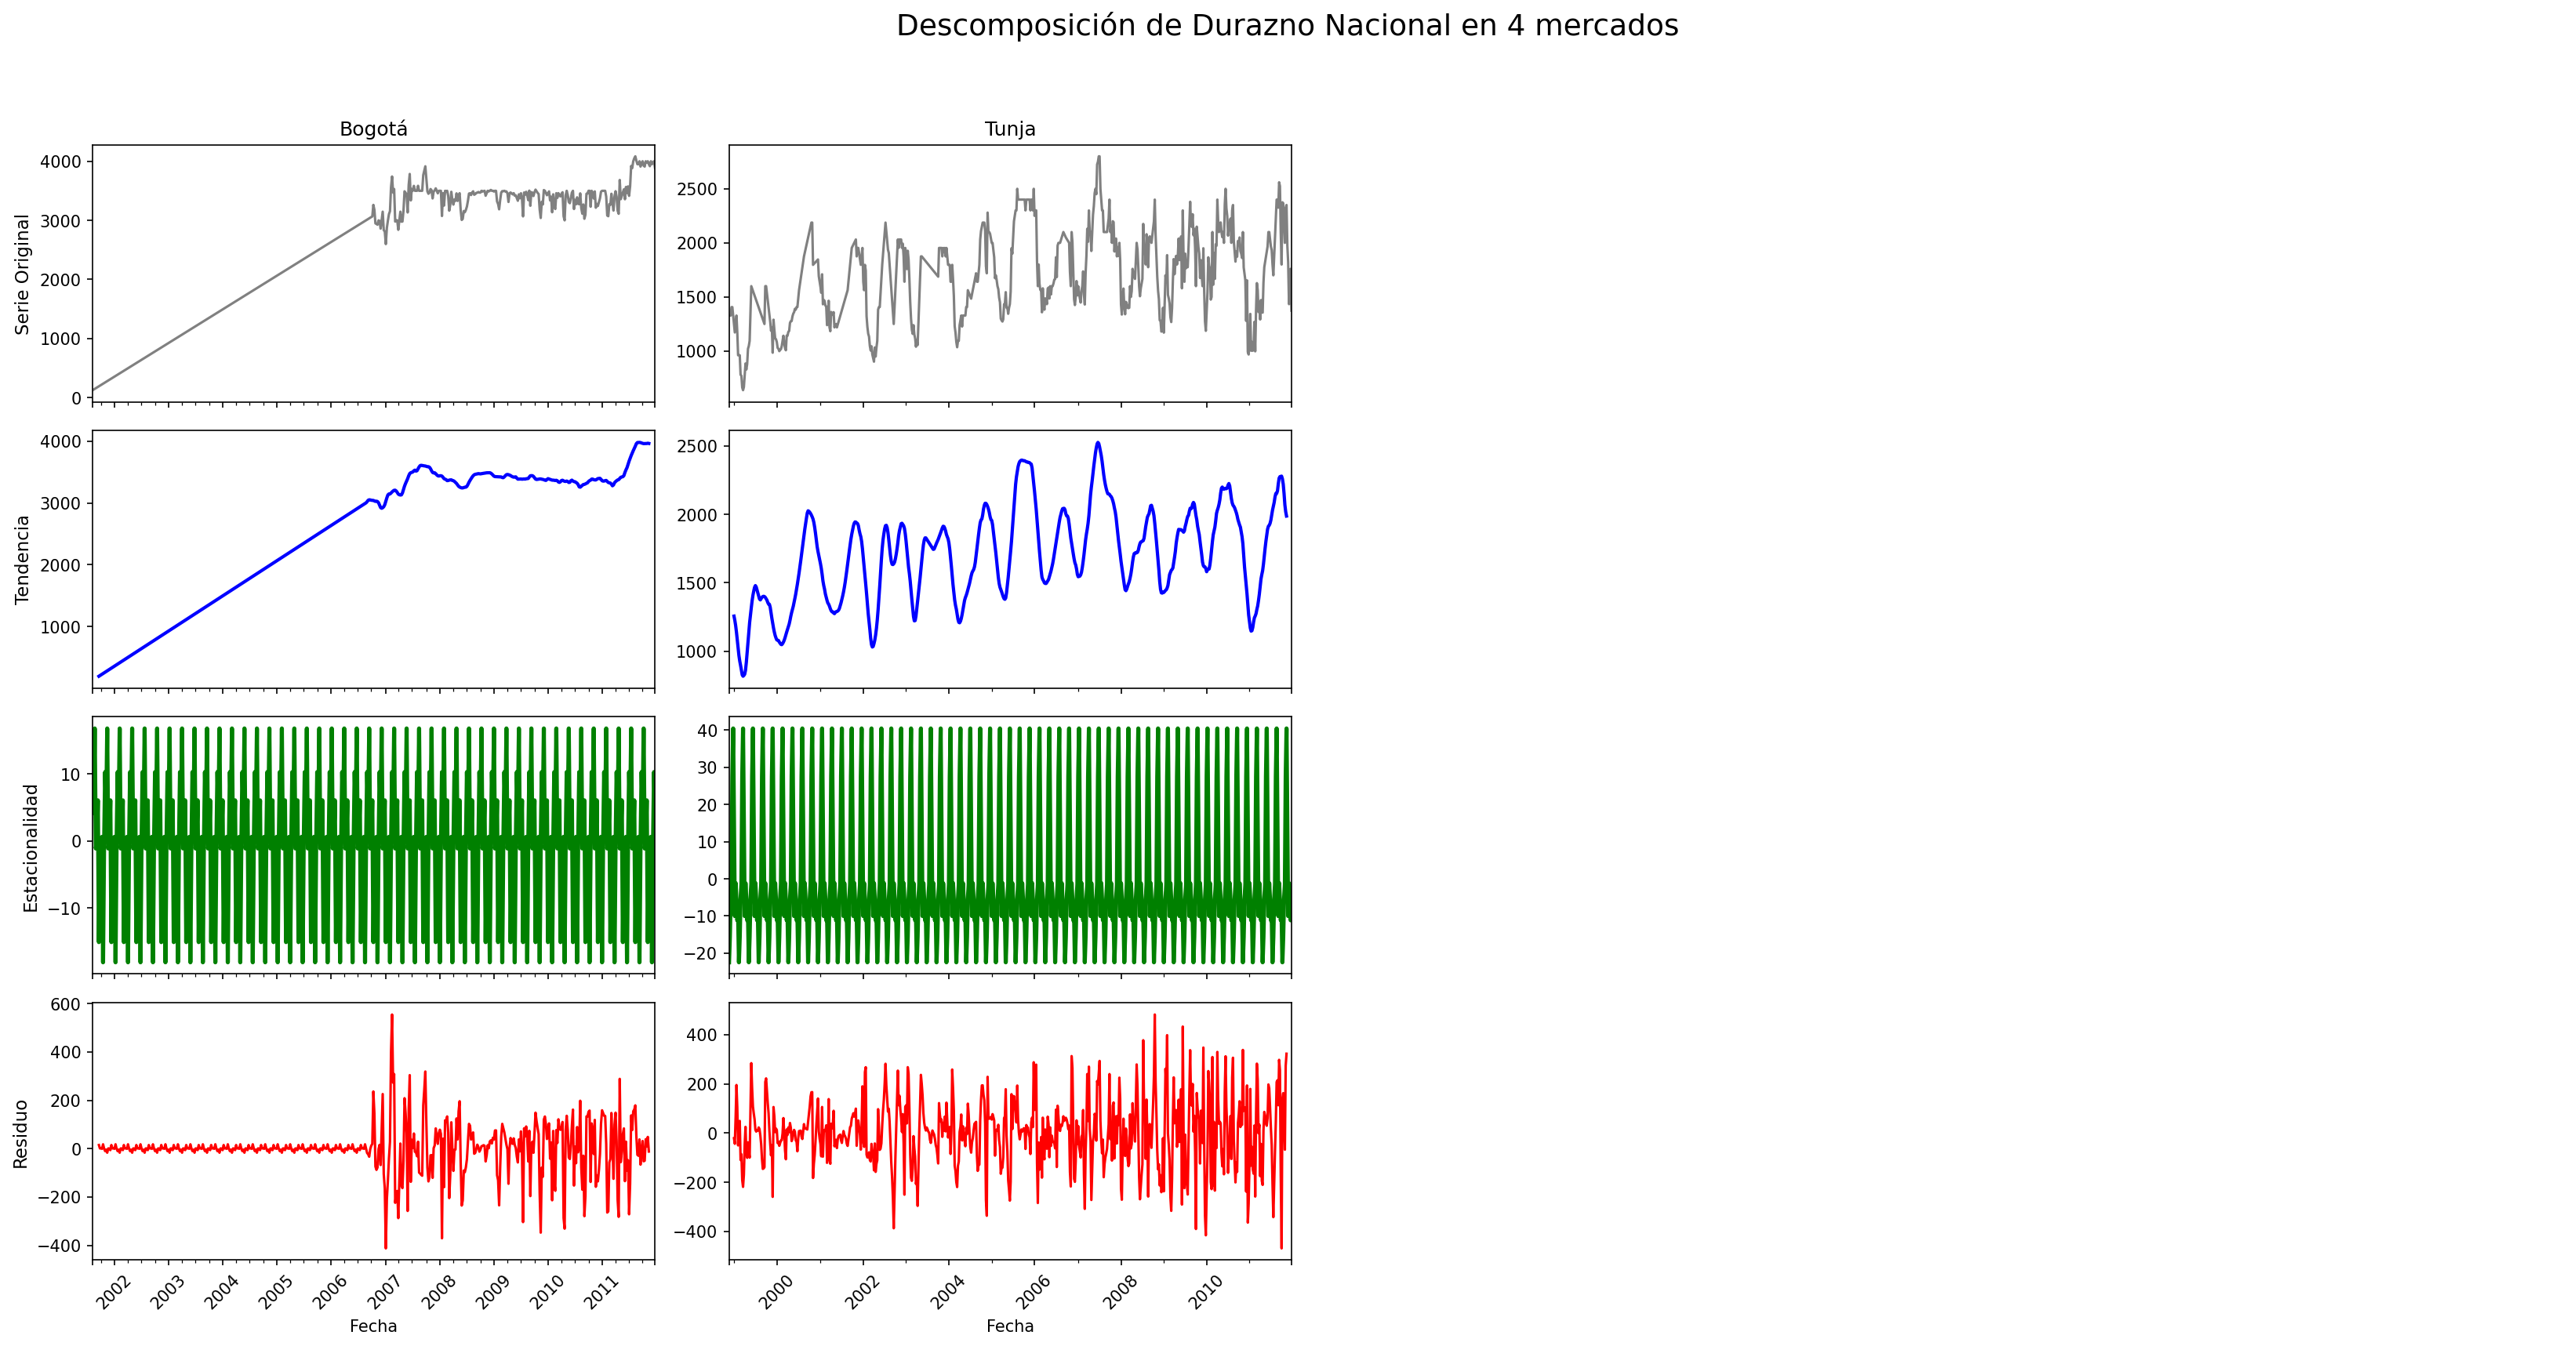

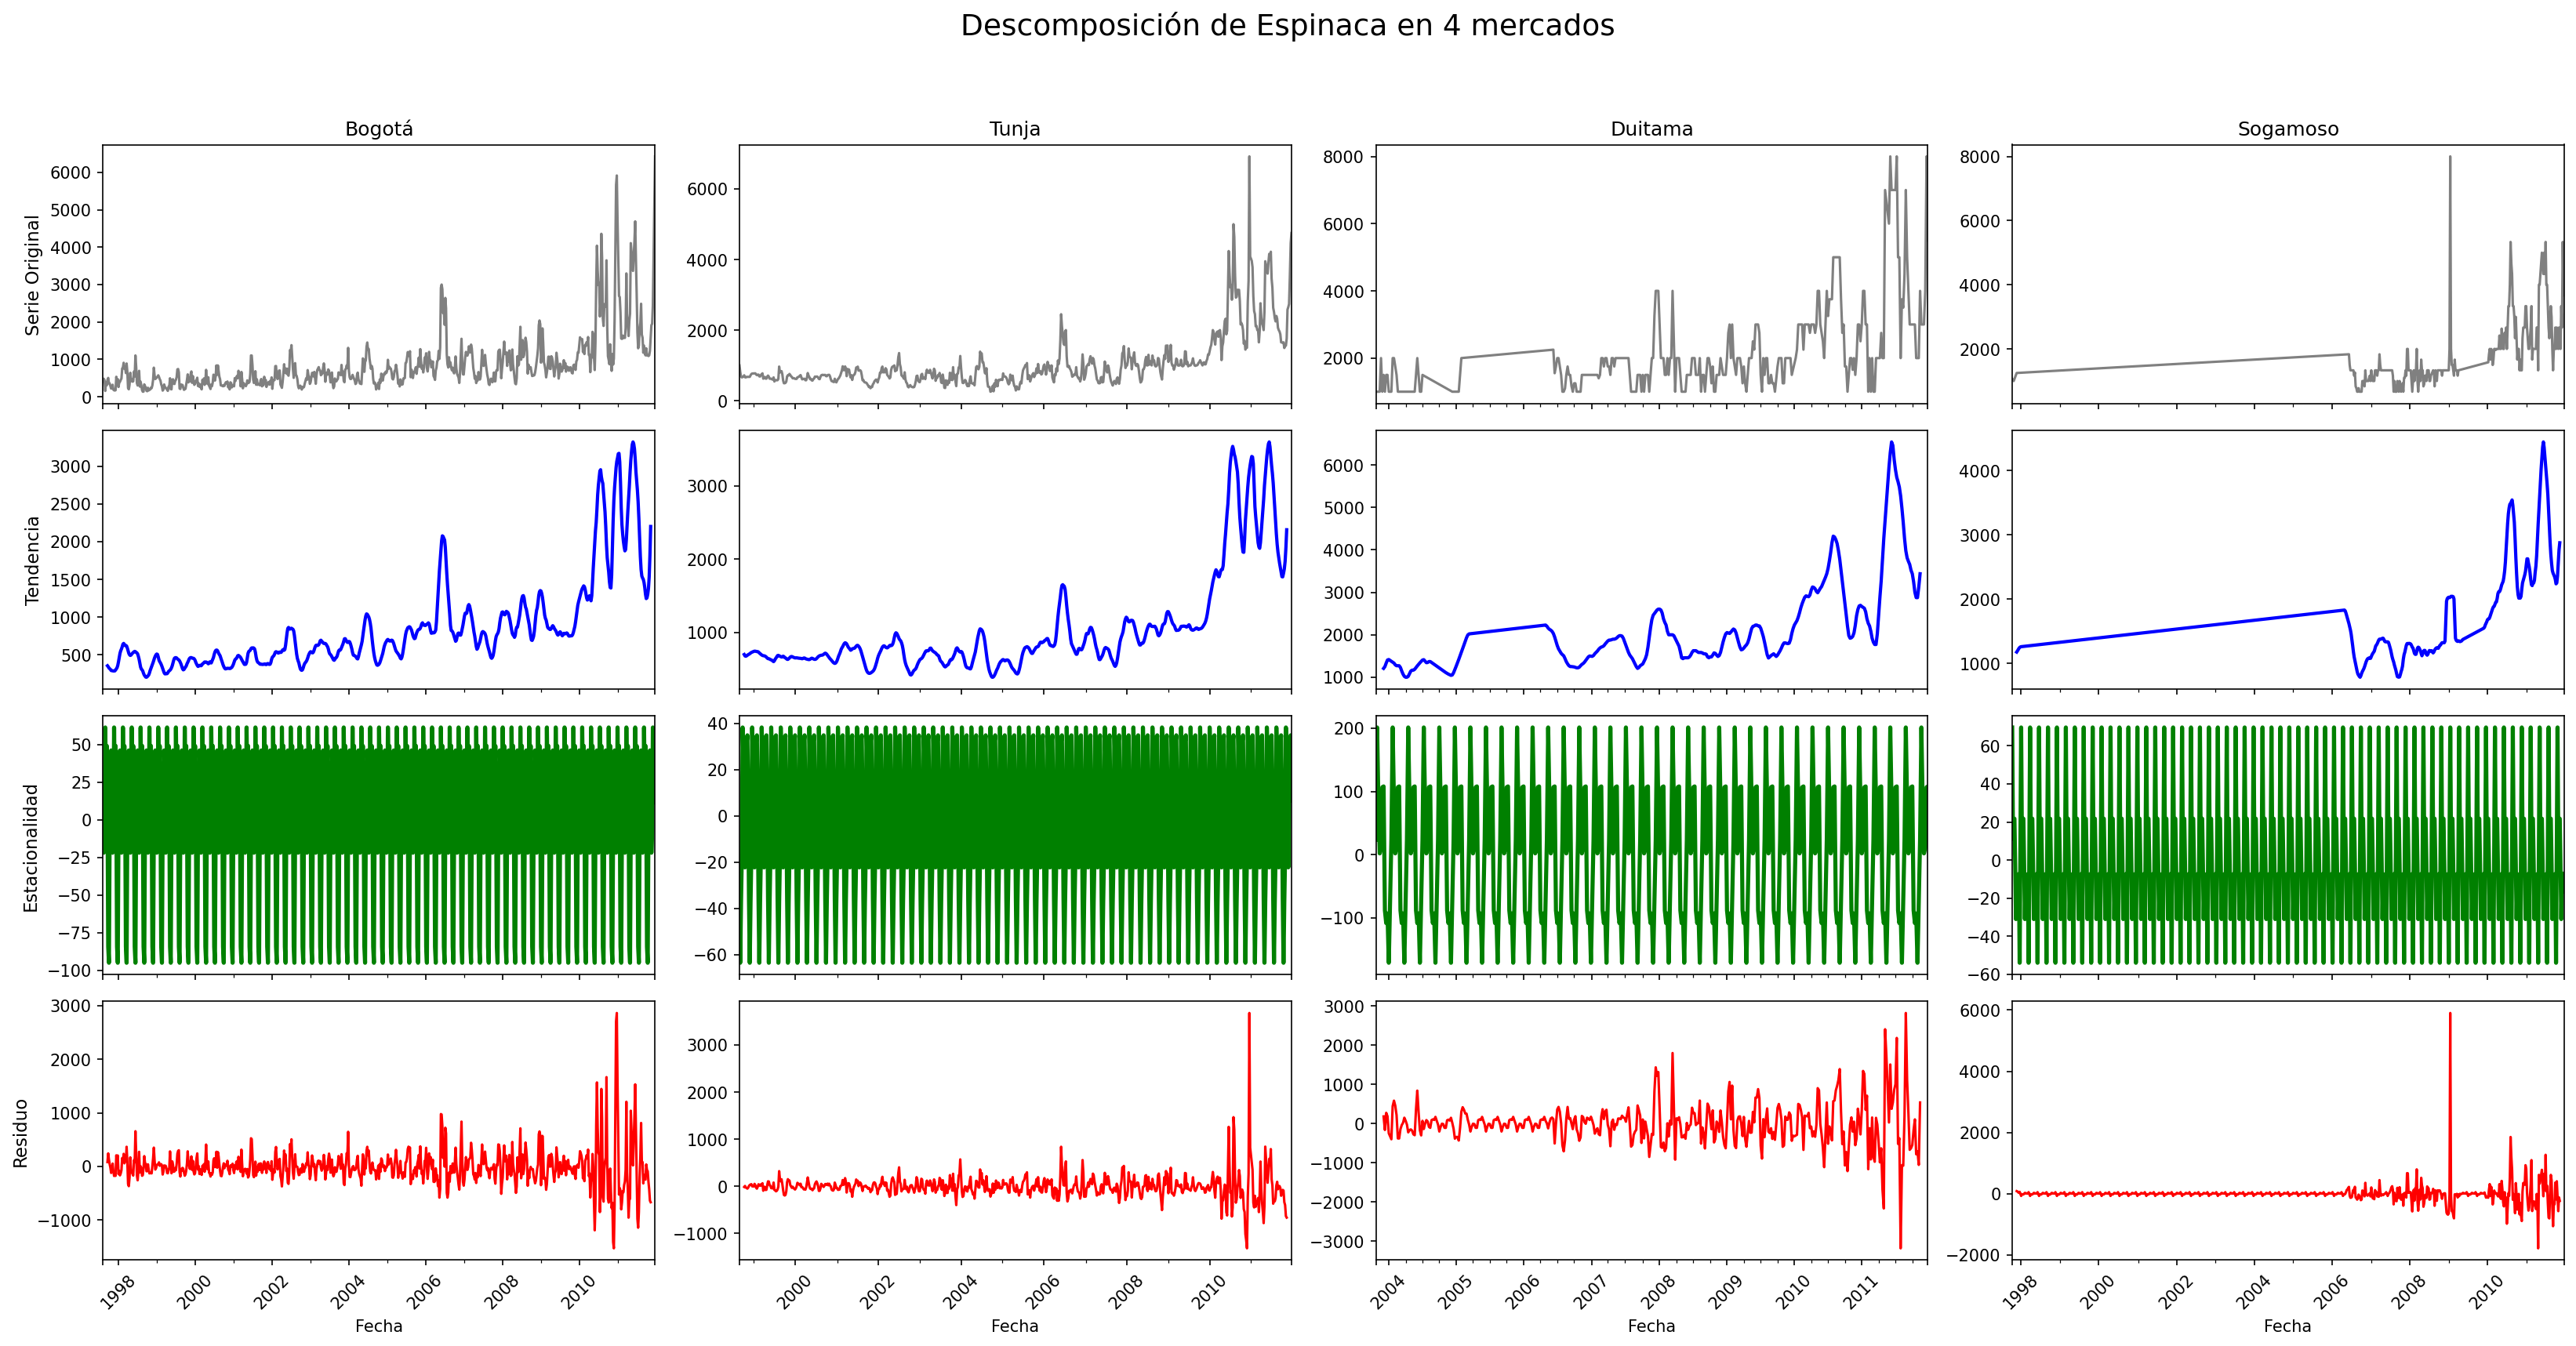

ValueError: x must have 2 complete cycles requires 24 observations. x only has 20 observation(s)

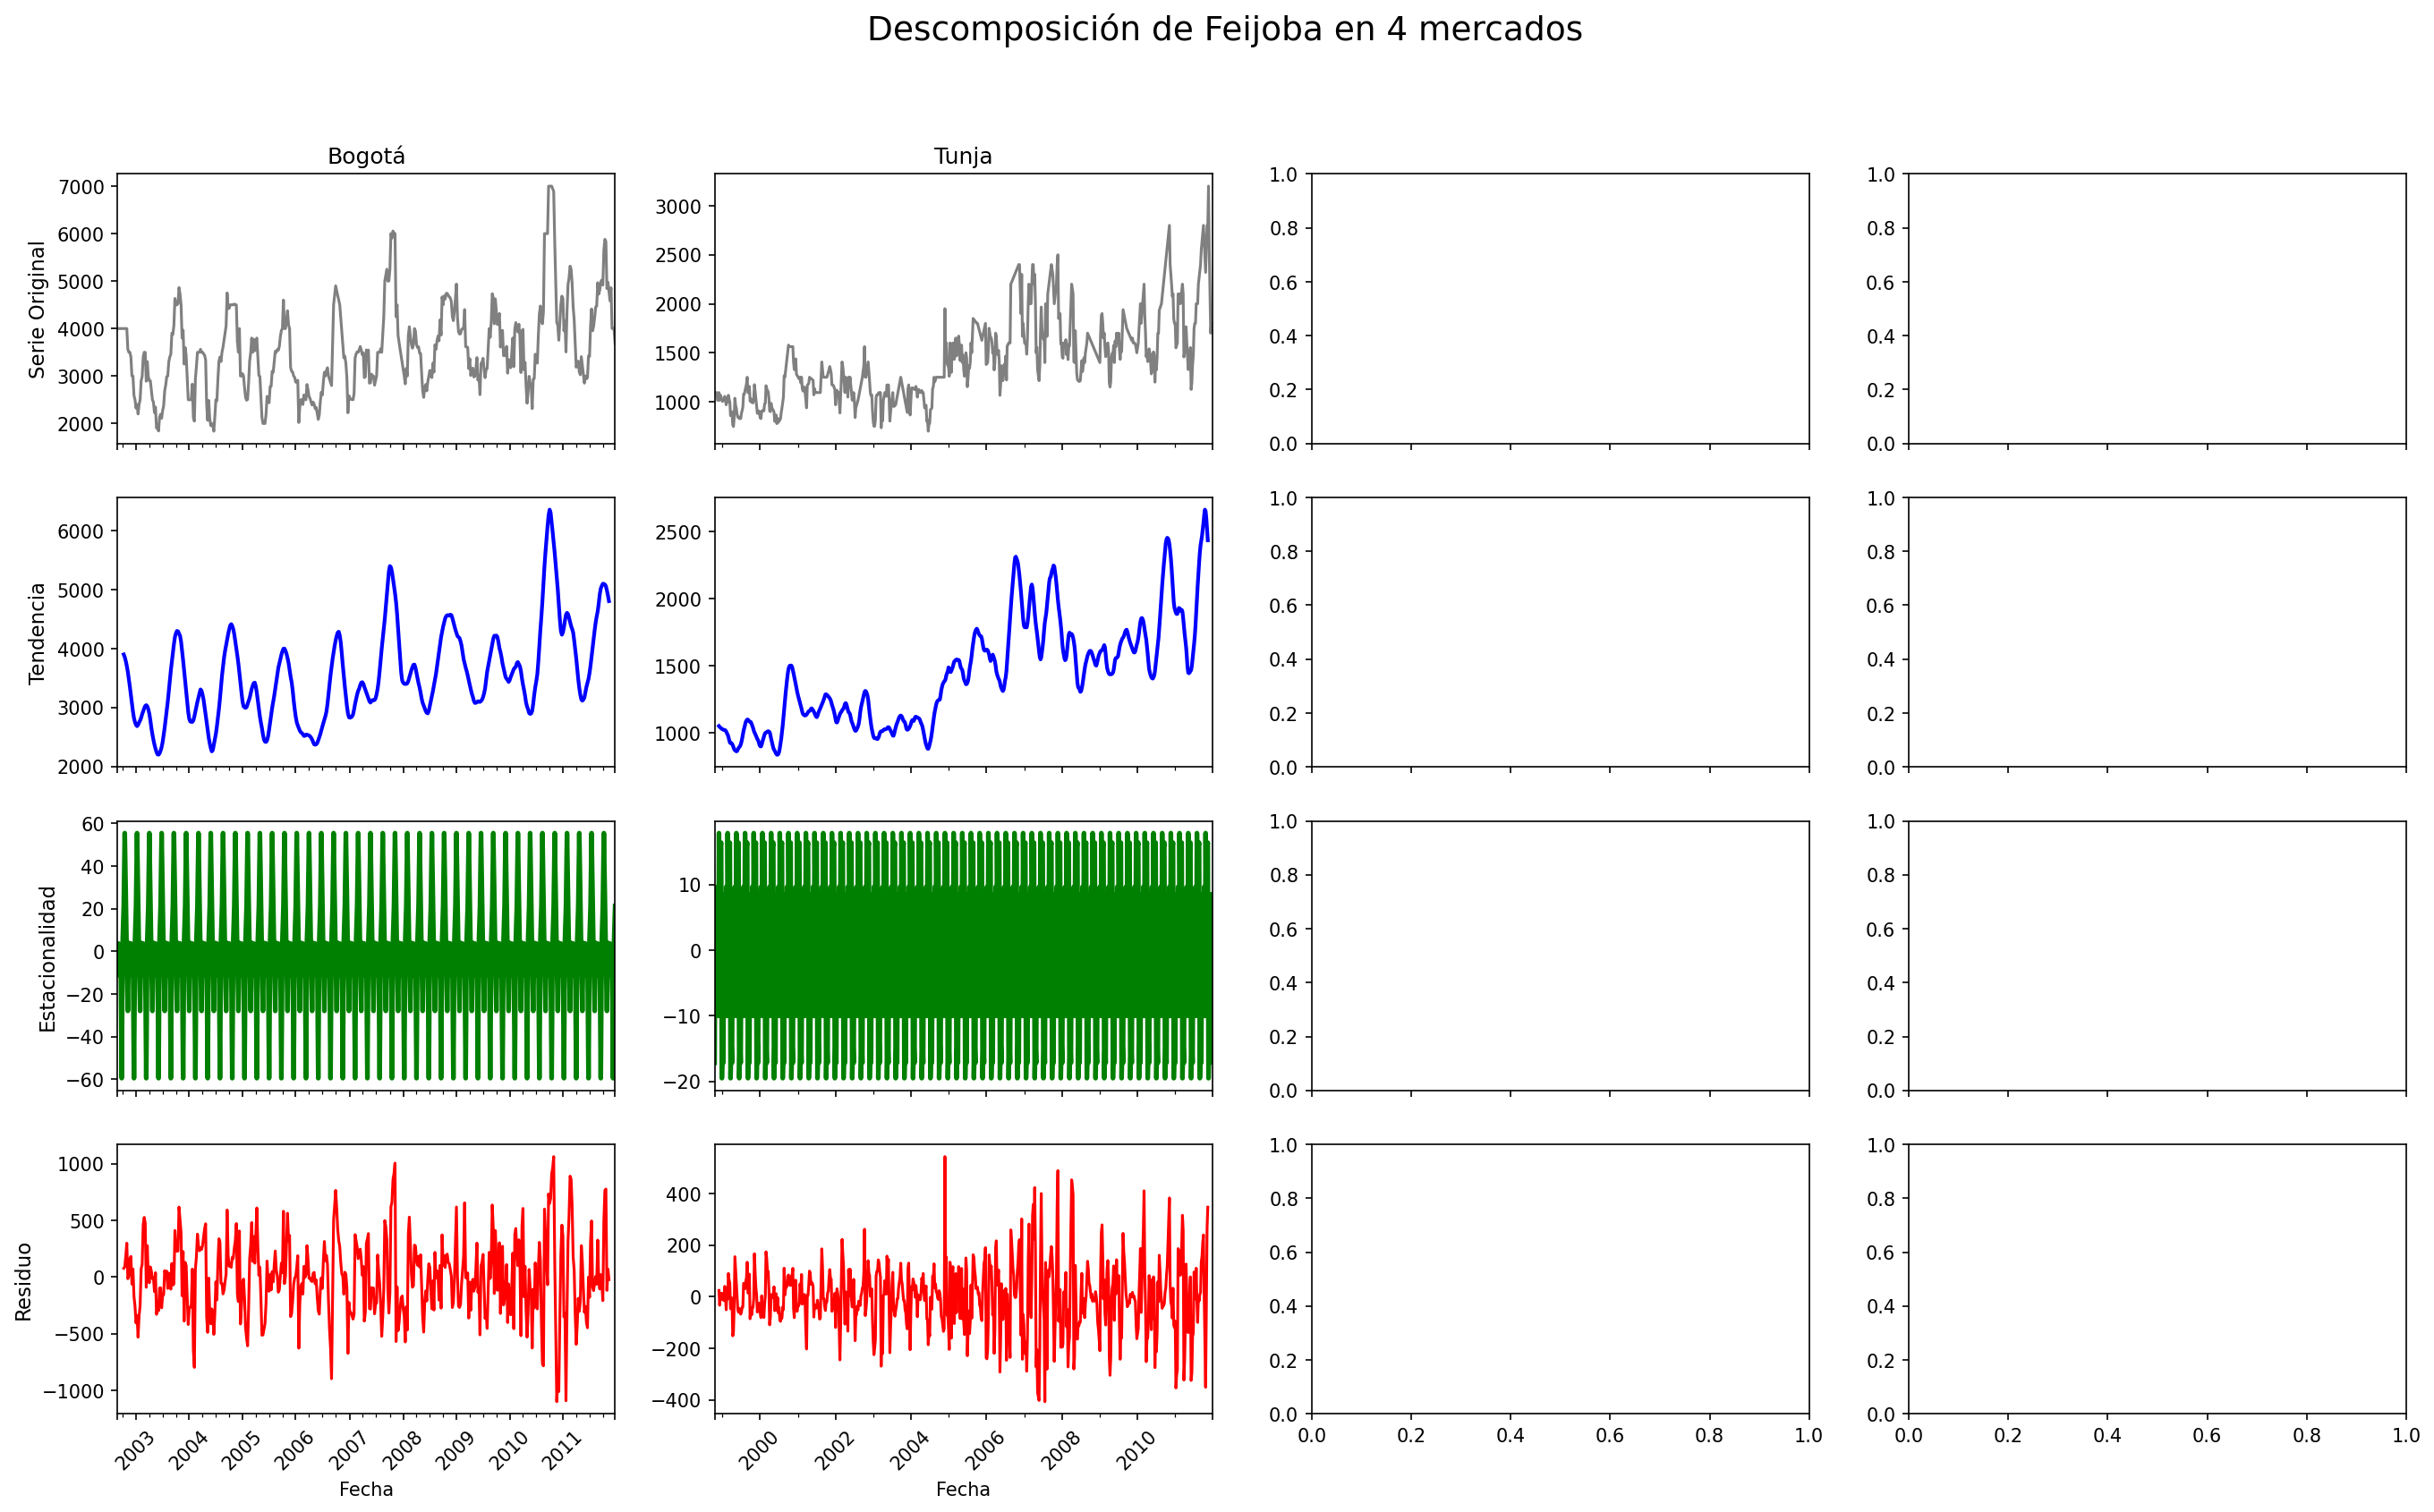

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Leer datos
df_agronet = pd.read_excel("../Data/agronet_final.xlsx")
df_agronet['Fecha'] = pd.to_datetime(df_agronet['Fecha'])

# Definir mercados ya normalizados
mercados_objetivo = ['Bogotá', 'Tunja', 'Duitama', 'Sogamoso']

# Obtener productos presentes en los mercados objetivo
productos_comunes = df_agronet[df_agronet['Mercado'].isin(mercados_objetivo)]['Producto'].unique()

# Iterar sobre productos
for producto in productos_comunes:
    fig, axes = plt.subplots(4, len(mercados_objetivo), figsize=(5.5 * len(mercados_objetivo), 12), dpi=150, sharex='col')
    fig.suptitle(f"Descomposición de {producto} en 4 mercados", fontsize=18)

    componentes = ['Serie Original', 'Tendencia', 'Estacionalidad', 'Residuo']

    for j, mercado in enumerate(mercados_objetivo):
        df_prod = df_agronet[(df_agronet['Mercado'] == mercado) & (df_agronet['Producto'] == producto)].copy()
        df_prod = df_prod.sort_values('Fecha')
        df_prod['Precio'] = pd.to_numeric(df_prod['Precio'], errors='coerce')
        df_prod = df_prod.dropna(subset=['Precio'])

        df_resample = df_prod.set_index('Fecha').resample('W')['Precio'].mean().interpolate()

        if len(df_resample) < 12:
            for i in range(4):
                axes[i, j].axis('off')
            continue

        descomp = seasonal_decompose(df_resample, model='additive', period=12)

        datos = [descomp.observed, descomp.trend, descomp.seasonal, descomp.resid]
        colores = ['gray', 'blue', 'green', 'red']
        grosores = [1.5, 2, 2.5, 1.5]

        for i, (serie, color, lw) in enumerate(zip(datos, colores, grosores)):
            serie.plot(ax=axes[i, j], color=color, linewidth=lw)
            if j == 0:
                axes[i, j].set_ylabel(componentes[i], fontsize=11)
            axes[i, j].tick_params(axis='x', rotation=45)

            if i == 0:
                axes[i, j].set_title(mercado, fontsize=12)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Generar Tablas promedio con estacionalidad

### Corabastos.

In [5]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Leer datos
df_Com = pd.read_excel("../Data/agronet_final.xlsx")
df_Com['Fecha'] = pd.to_datetime(df_agronet['Fecha'])


mercado_corto = 'Bogota'

# Filtrar datos para ese mercado
df_mercado = df_agronet[df_agronet['Mercado'] == mercado_corto]

productos = df_mercado['Producto'].unique()

resultados = []

for producto in productos:
    df_prod = df_mercado[df_mercado['Producto'] == producto].copy()
    df_prod = df_prod.sort_values('Fecha')

    df_prod['Precio'] = pd.to_numeric(df_prod['Precio'], errors='coerce')
    df_prod = df_prod.dropna(subset=['Precio'])

    df_resample = df_prod.set_index('Fecha').resample('W')['Precio'].mean().interpolate()

    if len(df_resample) < 12:
        continue

    descomp = seasonal_decompose(df_resample, model='additive', period=12)

    mean_trend = descomp.trend.mean()
    mean_seasonal = descomp.seasonal.mean()
    mean_resid = descomp.resid.abs().mean()

    resultados.append({
        'Mercado': mercado_corto,
        'Producto': producto,
        'Promedio Tendencia': mean_trend,
        'Promedio Estacionalidad': mean_seasonal,
        'Promedio Residuo (abs)': mean_resid
    })

df_resumen = pd.DataFrame(resultados)
#df_resumen = df_resumen.sort_values('Producto').reset_index(drop=True)

df_resumen.head(60)


Empty DataFrame
Columns: []
Index: []

### Tunja

In [6]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Leer datos
df_agronet = pd.read_excel("../Data/agronet_final.xlsx")
df_agronet['Fecha'] = pd.to_datetime(df_agronet['Fecha'])


mercado_corto = 'Tunja'

# Filtrar datos para ese mercado
df_mercado = df_agronet[df_agronet['Mercado'] == mercado_corto]

productos = df_mercado['Producto'].unique()

resultados = []

for producto in productos:
    df_prod = df_mercado[df_mercado['Producto'] == producto].copy()
    df_prod = df_prod.sort_values('Fecha')

    df_prod['Precio'] = pd.to_numeric(df_prod['Precio'], errors='coerce')
    df_prod = df_prod.dropna(subset=['Precio'])

    df_resample = df_prod.set_index('Fecha').resample('W')['Precio'].mean().interpolate()

    if len(df_resample) < 12:
        continue

    descomp = seasonal_decompose(df_resample, model='additive', period=12)

    mean_trend = descomp.trend.mean()
    mean_seasonal = descomp.seasonal.mean()
    mean_resid = descomp.resid.abs().mean()

    resultados.append({
        'Mercado': mercado_corto,
        'Producto': producto,
        'Promedio Tendencia': mean_trend,
        'Promedio Estacionalidad': mean_seasonal,
        'Promedio Residuo (abs)': mean_resid
    })

df_resumen = pd.DataFrame(resultados)
#df_resumen = df_resumen.sort_values('Producto').reset_index(drop=True)

df_resumen.head(60)

Mercado                 Producto  Promedio Tendencia  \
0    Tunja       Aguacate Papelillo         3429.970977   
1    Tunja                      Ajo         2697.250018   
2    Tunja       Arracacha Amarilla          676.990091   
3    Tunja    Arveja Verde En Vaina         1799.366149   
4    Tunja             Banano Urabá          563.147808   
5    Tunja  Cebolla Cabezona Blanca          748.783738   
6    Tunja    Cebolla Cabezona Roja          859.728471   
7    Tunja                 Cilantro         1199.931180   
8    Tunja         Durazno Nacional         1706.659190   
9    Tunja                 Espinaca         1043.600696   
10   Tunja                  Feijoba         1437.995434   
11   Tunja                    Fresa         3701.480632   
12   Tunja                Guanabana         2819.306713   
13   Tunja                  Guayaba          345.534657   
14   Tunja               Habichuela         1025.323673   
15   Tunja             Limon Tahití          871.375200   
16   Tunja                     Lulo         1694.984888   
17   Tunja                Mandarina          672.643440   
18   Tunja             Mango Azucar         1165.208929   
19   Tunja              Mango Tommy         1082.102939   
20   Tunja         Manzana Nacional          918.862402   
21   Tunja   Manzana Roja Importada         2628.608072   
22   Tunja  Manzana Verde Importada         2873.849507   
23   Tunja                 Maracuyá         1229.221788   
24   Tunja                    Melon         1238.787056   
25   Tunja         Mora De Castilla         1610.377496   
26   Tunja            Naranja Comun          335.183229   
27   Tunja         Naranja Valencia          465.960008   
28   Tunja      Papa Criolla Limpia          650.646291   
29   Tunja           Papaya Maradol          991.027886   
30   Tunja          Pepino Cohombro          568.065147   
31   Tunja                  Perejil         1156.686696   
32   Tunja                 Pimentón          997.024324   
33   Tunja                Piña Gold         1798.934251   
34   Tunja                Remolacha          510.371504   
35   Tunja            Repollo Verde          308.314420   
36   Tunja            Tomate Chonto         1034.408647   
37   Tunja                   Uchuva         1873.677906   
38   Tunja            Uva Isabelita         2345.612511   
39   Tunja                Zanahoria          538.005601   

    Promedio Estacionalidad  Promedio Residuo (abs)  
0             -2.150024e-02               37.407701  
1             -3.875652e-02              219.684893  
2             -3.257526e-03               51.566099  
3              5.416519e-02              230.299813  
4             -7.004624e-03               14.333287  
5             -1.164738e-02               97.195485  
6             -1.516663e-01               79.169159  
7              9.585707e-03              339.159349  
8             -1.007641e-15              101.661194  
9              5.308653e-16              141.663255  
10            -2.970219e-02               94.269455  
11            -1.487840e-02              113.809801  
12            -3.823274e-02              118.914593  
13            -4.992952e-02               37.647834  
14            -1.588471e-02              157.906190  
15             2.802252e-02              118.742701  
16             2.674370e-02               79.139862  
17             3.083568e-02               52.707318  
18             6.662025e-03               58.271974  
19             1.411411e-02              126.570166  
20            -1.970448e-03               46.566356  
21             3.189189e-02               94.535110  
22             7.712715e-02              112.042095  
23            -3.879400e-16              120.850289  
24             8.167158e-17              150.205772  
25             2.909596e-02               98.080404  
26             6.978431e-03               19.519035  
27            -9.745313e-03               17.644913  
28             1.

### Duitama

In [7]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Leer datos
df_agronet = pd.read_excel("../Data/agronet_final.xlsx")
df_agronet['Fecha'] = pd.to_datetime(df_agronet['Fecha'])


mercado_corto = 'Duitama'

# Filtrar datos para ese mercado
df_mercado = df_agronet[df_agronet['Mercado'] == mercado_corto]

productos = df_mercado['Producto'].unique()

resultados = []

for producto in productos:
    df_prod = df_mercado[df_mercado['Producto'] == producto].copy()
    df_prod = df_prod.sort_values('Fecha')

    df_prod['Precio'] = pd.to_numeric(df_prod['Precio'], errors='coerce')
    df_prod = df_prod.dropna(subset=['Precio'])

    df_resample = df_prod.set_index('Fecha').resample('W')['Precio'].mean().interpolate()

    if len(df_resample) < 12:
        continue

    descomp = seasonal_decompose(df_resample, model='additive', period=12)

    mean_trend = descomp.trend.mean()
    mean_seasonal = descomp.seasonal.mean()
    mean_resid = descomp.resid.abs().mean()

    resultados.append({
        'Mercado': mercado_corto,
        'Producto': producto,
        'Promedio Tendencia': mean_trend,
        'Promedio Estacionalidad': mean_seasonal,
        'Promedio Residuo (abs)': mean_resid
    })

df_resumen = pd.DataFrame(resultados)
#df_resumen = df_resumen.sort_values('Producto').reset_index(drop=True)

df_resumen.head(60)

ValueError: x must have 2 complete cycles requires 24 observations. x only has 20 observation(s)

### Sogamoso

In [8]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Leer datos
df_agronet = pd.read_excel("../Data/agronet_final.xlsx")
df_agronet['Fecha'] = pd.to_datetime(df_agronet['Fecha'])


mercado_corto = 'Sogamoso'

# Filtrar datos para ese mercado
df_mercado = df_agronet[df_agronet['Mercado'] == mercado_corto]

productos = df_mercado['Producto'].unique()

resultados = []

for producto in productos:
    df_prod = df_mercado[df_mercado['Producto'] == producto].copy()
    df_prod = df_prod.sort_values('Fecha')

    df_prod['Precio'] = pd.to_numeric(df_prod['Precio'], errors='coerce')
    df_prod = df_prod.dropna(subset=['Precio'])

    df_resample = df_prod.set_index('Fecha').resample('W')['Precio'].mean().interpolate()

    if len(df_resample) < 12:
        continue

    descomp = seasonal_decompose(df_resample, model='additive', period=12)

    mean_trend = descomp.trend.mean()
    mean_seasonal = descomp.seasonal.mean()
    mean_resid = descomp.resid.abs().mean()

    resultados.append({
        'Mercado': mercado_corto,
        'Producto': producto,
        'Promedio Tendencia': mean_trend,
        'Promedio Estacionalidad': mean_seasonal,
        'Promedio Residuo (abs)': mean_resid
    })

df_resumen = pd.DataFrame(resultados)
#df_resumen = df_resumen.sort_values('Producto').reset_index(drop=True)

df_resumen.head(60)

ValueError: x must have 2 complete cycles requires 24 observations. x only has 15 observation(s)

### Comparativo entre los cuatro mercados

In [9]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Leer datos
df_agronet = pd.read_excel("../Data/agronet_final.xlsx")
df_agronet['Fecha'] = pd.to_datetime(df_agronet['Fecha'])


# Mercados a comparar
mercados_objetivo = ['Duitama', 'Tunja', 'Sogamoso', 'Corabastos']

# Almacena resultados
resultados = []

# Procesar cada mercado y producto
for mercado in mercados_objetivo:
    df_mercado = df_agronet[df_agronet['Mercado'] == mercado]
    productos = df_mercado['Producto'].unique()

    for producto in productos:
        df_prod = df_mercado[df_mercado['Producto'] == producto].copy()
        df_prod = df_prod.sort_values('Fecha')

        df_prod['Precio'] = pd.to_numeric(df_prod['Precio'], errors='coerce')
        df_prod = df_prod.dropna(subset=['Precio'])

        df_resample = df_prod.set_index('Fecha').resample('W')['Precio'].mean().interpolate()

        if len(df_resample) < 12:
            continue

        try:
            descomp = seasonal_decompose(df_resample, model='additive', period=12)
            resultados.append({
                'Producto': producto,
                'Mercado': mercado,
                'Tendencia': descomp.trend.mean(),
                'Estacionalidad': descomp.seasonal.mean(),
                'Residuo': descomp.resid.abs().mean()
            })
        except:
            continue

# Crear DataFrame y pivotearlo
df_resultados = pd.DataFrame(resultados)

# Reorganizar para columnas por mercado
df_pivot = df_resultados.pivot(index='Producto', columns='Mercado', values=['Tendencia', 'Estacionalidad', 'Residuo'])

# Aplanar columnas jerárquicas
df_pivot.columns = [f"{metrica} {mercado}" for metrica, mercado in df_pivot.columns]
df_pivot = df_pivot.reset_index()

# Mostrar los primeros resultados
df_pivot.head(60)


Producto  Tendencia Duitama  Tendencia Sogamoso  \
0        Aguacate Papelillo                NaN         3672.735507   
1                       Ajo        2324.416412         2272.344040   
2        Arracacha Amarilla         987.499930          950.326183   
3     Arveja Verde En Vaina        2225.311388         2341.498204   
4              Banano Urabá         569.198383          593.154783   
5   Cebolla Cabezona Blanca         816.503638          774.212461   
6     Cebolla Cabezona Roja                NaN                 NaN   
7                  Cilantro        1481.959932         1823.883585   
8          Durazno Nacional                NaN                 NaN   
9                  Espinaca        2109.016072         1624.670549   
10                  Feijoba                NaN         2106.440972   
11                    Fresa        3277.825716         3123.536173   
12                Guanabana        3166.429539         2539.133326   
13                  Guayaba         451.464371                 NaN   
14               Habichuela        1276.467017         1005.748967   
15             Limon Tahití         848.085080          703.694917   
16                     Lulo        2379.428822         1810.711140   
17                Mandarina        1043.873657                 NaN   
18             Mango Azucar                NaN                 NaN   
19              Mango Tommy        1531.060309         1540.714197   
20         Manzana Nacional                NaN                 NaN   
21   Manzana Roja Importada        2829.053417         2225.310651   
22  Manzana Verde Importada        3251.886810         3182.831089   
23                 Maracuyá        1399.280810         1084.431333   
24                    Melon        1341.544904         1407.403262   
25         Mora De Castilla        2174.490641         2104.591728   
26            Naranja Comun         268.173979          251.761787   
27         Naranja Valencia         656.209976          320.317479   
28      Papa Criolla Limpia         855.693656          855.300584   
29           Papaya Maradol         953.332540          917.207080   
30          Pepino Cohombro         828.974551          421.561872   
31                  Perejil        1269.228969         1865.374336   
32                 Pimentón        1187.115582         1035.282350   
33                Piña Gold                NaN                 NaN   
34                Remolacha         564.056067          539.221973   
35            Repollo Verde         379.159588          629.157674   
36            Tomate Chonto        1179.535617          870.441431   
37                   Uchuva        2079.372066                 NaN   
38            Uva Isabelita        2135.322462                 NaN   
39             Yuca Llanera         650.204404          640.615249   
40                Zanahoria         823.049161          841.830556   

    Tendencia Tunja  Estacionalidad Duitama  Estacionalidad Sogamoso  \
0       3429.970977                     NaN             2.549290e+00   
1       2697.250018            2.243716e-01             1.228307e-02   
2        676.990091           -6.420199e-02            -3.543925e-02   
3       1799.366149            3.905528e-01             1.259023e-01   
4        563.147808            2.985433e-02             4.353444e-03   
5        748.783738           -2.744298e-02            -7.386249e-02   
6        859.728471                     NaN                      NaN   
7       1199.931180            5.925037e-01             2.343383e-01   
8       1706.659190                     NaN                      NaN   
9       1043.600696            1.249964e+00             6.281112e-02   
10      1437.995434                     NaN             8.458842e-17   
11      3701.480632           -6.174604e-01            -9.240345e-02   
12      2819.306713           -1.675934e-01            -7.572330e-03   
13       345.534657           -1.662305e-02                      NaN  

## Dataset Coomproriente

No presenta muchos datos entonces no se puede hacer un analisis de estacionalidad